# INTRODUCTION AUX STATISTIQUES

## 1. Objectifs, cours en ligne et jeux de données

> Dans ce livrable, nous allons explorer le modèle linéaire, la régression logistique et l'ANOVA en analysant des données simples et complexes. 

> L'objectif principal sera de comprendre l'engagement des apprenants dans un MOOC, en nous appuyant sur les résultats d’un article publié en 2015.

## 2. Un échauffement sur des données-type

In [178]:
# Import des bibliothèques :
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, mannwhitneyu, levene, chi2_contingency, spearmanr
import scipy.stats as stats
from statsmodels.api import qqplot
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib import colors
from statsmodels.formula.api import ols, logit
from statsmodels.stats.diagnostic import het_breuschpagan
import missingno as msno
from math import sqrt
import matplotlib.colors as mcolors
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import statsmodels.api as sm
from lifelines import CoxPHFitter
import matplotlib.ticker as mtick
from scipy.stats import kruskal

In [179]:
# Import du fichier CSV :
iris = pd.read_csv("dataset0.csv", 
                  sep = ",",
                  encoding = "utf-8",
                  engine = "python",
                  decimal = ",")

In [180]:
# Affichage des premières lignes du dataset 'iris' :
iris.head(3)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa


In [181]:
# Affichage des noms de colonnes :
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [182]:
# Création d'un dictionnaire de noms de colonnes :
new_column_names = {'sepal.length': 'sepal_length',
                    'sepal.width': 'sepal_width',
                    'petal.length': 'petal_length',
                    'petal.width': 'petal_width',
                    'variety': 'variety'}

In [183]:
# Changement des noms de colonnes :
iris.rename(columns = new_column_names, 
            inplace = True)
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'variety'],
      dtype='object')


In [184]:
# Modification du style du graphique :
sns.set()

In [185]:
# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

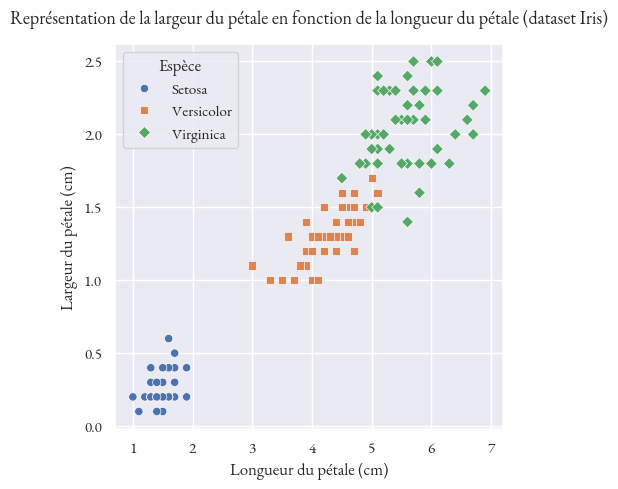

In [186]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du scatterplot :
sns.scatterplot(x = 'petal_length',
                y = 'petal_width', 
                hue = 'variety', 
                style = 'variety', 
                markers = ['o', 's', 'D'], 
                data = iris)

# Ajout du titre :
plt.title('Représentation de la largeur du pétale en fonction de la longueur du pétale (dataset Iris)', 
          fontsize = 13, 
          pad = 15)

# Ajout des étiquettes aux axes :
plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largeur du pétale (cm)')

# Affichage de la légende :
plt.legend(title = 'Espèce')

# Affichage du graphique :
plt.show()

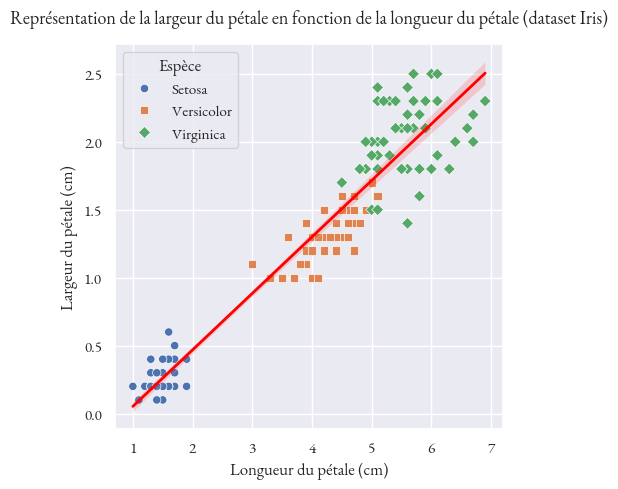

In [187]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du scatterplot :
sns.scatterplot(x = 'petal_length',
                y = 'petal_width', 
                hue = 'variety', 
                style = 'variety', 
                markers = ['o', 's', 'D'], 
                data = iris)

# Ajout du regplot :
sns.regplot(x = 'petal_length', 
            y = 'petal_width', 
            data = iris, 
            scatter = False,
            color = 'black',
            line_kws = {'color': 'red', 'linewidth': 2})

# Ajout du titre :
plt.title('Représentation de la largeur du pétale en fonction de la longueur du pétale (dataset Iris)', 
          fontsize = 13, 
          pad = 15)

# Ajout des étiquettes aux axes :
plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largeur du pétale (cm)')

# Affichage de la légende :
plt.legend(title = 'Espèce')

# Affichage du graphique :
plt.show()

In [188]:
# Calcul et affichage du coefficient de corrélation de Pearson :
corr, _ = pearsonr(iris['petal_length'], iris['petal_width'])
print(f"Le coefficient de corrélation de Pearson est : {corr:.2f}.")

Le coefficient de corrélation de Pearson est : 0.96.


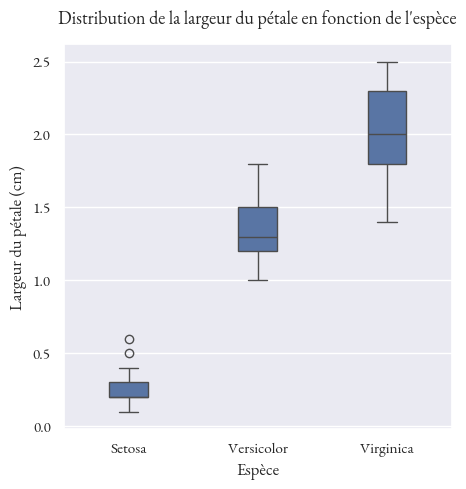

In [189]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du boxplot :
sns.boxplot(x = 'variety', 
            y = 'petal_width', 
            data = iris,
            width = 0.3)

# Ajout du titre :
plt.title("Distribution de la largeur du pétale en fonction de l'espèce",
          pad = 15,
          fontsize = 13)

# Ajout des étiquettes aux axes :
plt.xlabel('Espèce')
plt.ylabel('Largeur du pétale (cm)')

# Affichage de la figure :
plt.show()

In [190]:
# Séparation des données par espèces :
setosa = iris[iris['variety'] == 'Setosa']['petal_width']
versicolor = iris[iris['variety'] == 'Versicolor']['petal_width']
virginica = iris[iris['variety'] == 'Virginica']['petal_width']

In [191]:
# Réalisation de l'ANOVA :
f_stat, p_val = stats.f_oneway(setosa, versicolor, virginica)

In [192]:
# Affichage des résultats :
print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_val:.3f}")

F-statistic: 960.007
P-value: 0.000


In [193]:
# Interprétation des résultats
if p_val < 0.05:
    print("Il existe une différence significative dans la largeur du pétale entre les espèces.")
else:
    print("Il n'y a pas de différence significative dans la largeur du pétale entre les espèces.")

Il existe une différence significative dans la largeur du pétale entre les espèces.


In [194]:
# Nombre d'espèces (k) :
k = 3

# Nombre total d'observations (n) :
n = len(setosa) + len(versicolor) + len(virginica)

# Somme des carrés entre groupes (SSB) :
grand_mean = iris['petal_width'].mean()
ssb = sum(len(group) * (group.mean() - grand_mean) ** 2 for group in [setosa, versicolor, virginica])

# Somme des carrés à l'intérieur des groupes (SSW) :
ssw = sum(((group - group.mean()) ** 2).sum() for group in [setosa, versicolor, virginica])

# Degrés de liberté entre groupes :
dfb = k - 1  

# Degrés de liberté à l'intérieur des groupes :
dfw = n - k  

# Moyennes des carrés (MS) :
msb = ssb / dfb
msw = ssw / dfw

# Calcul de la statistique F :
f_stat = msb / msw

# Niveau de signification alpha pour calculer F-crit :
alpha = 0.05

# Calcul de la valeur critique F-crit à partir de la distribution de Fisher :
f_crit = stats.f.ppf(1 - alpha, dfb, dfw)

In [195]:
# Création de la table d'ANOVA :
anova_table_classique = pd.DataFrame({'Source of variation': ['Between Groups', 'Within Groups', 'Total'],
                                      'Sum of Squares (SS)': ["{:.2f}".format(ssb), "{:.2f}".format(ssw), "{:.2f}".format(ssb + ssw)],
                                      'Degrees of Freedom (df)': [dfb, dfw, n - 1],
                                      'Mean Square (MS)': ["{:.2f}".format(msb), "{:.2f}".format(msw), ''],
                                      'F-statistic': ["{:.0f}".format(f_stat), '', ''],
                                      'p-value': ["{:.3f}".format(p_val), '', ''],
                                      'F-crit': ["{:.2f}".format(f_crit), '', '']})
anova_table_classique

,Source of variation,Sum of Squares (SS),Degrees of Freedom (df),Mean Square (MS),F-statistic,p-value,F-crit
0,Between Groups,80.41,2,40.21,960,0.000,3.06
1,Within Groups,6.16,147,0.04,,,
2,Total,86.57,149,,,,


> L'hypothèse nulle stipule qu'il n'y a pas de différences significatives entre les moyennes des espèces.

> La statistique F = 960 est très élevée, ce qui suggère que les moyennes des espèces sont très différentes les unes des autres.

> La p-value = 0.000 indique que cette différence est statistiquement significative au niveau de confiance de 95%. Cela signifie qu'il est très improbable que cette différence entre les groupes soit due au hasard.

> La valeur critique de F-crit = 3.06 est bien inférieure à la statistique F obtenue, ce qui confirme que l'on peut rejeter l'hypothèse nulle. 

> En conclusion, les espèces influencent de manière significative la largeur du pétale. 

In [196]:
# Création d'un modèle avec 'petal_width' en fonction de l'espèce :
model = smf.ols('petal_width ~ variety', data = iris).fit()

# Résumé détaillé du modèle :
results = model.summary2().tables[1]

# Changement du nom de la ligne 'Intercept' :
results.index = ['Intercept'] + list(results.index[1:])

# Sélection des colonnes pour afficher la table d'anova :
anova_table = results[['Coef.', 
                       'Std.Err.', 
                       't', 
                       'P>|t|']]

# Changement du nom des colonnes :
anova_table.columns = ['Estimate',                                      
                       'Std Error', 
                       't value', 
                       'Pr(>|t|)']

# Affichage de 3 décimales après la virgule :
pd.options.display.float_format = '{:.3f}'.format

# Affichage de la table d'anova :
anova_table

,Estimate,Std Error,t value,Pr(>|t|)
Intercept,0.246,0.029,8.500,0.000
variety[T.Versicolor],1.080,0.041,26.387,0.000
variety[T.Virginica],1.780,0.041,43.489,0.000


> On peut donc dire que, en moyenne :

>    - Versicolor a une largeur de pétale de 1.08 cm de plus que Setosa

>    - Virginica a une largeur de pétale de 1.78 cm de plus que Setosa

> Les t-values très élevées (8.5, 26.4, 43.5) et les p-values proches de zéro (toutes inférieures à 0.05) indiquent que les différences sont statistiquement significatives. 

> En résumé, les trois espèces ont des largeurs de pétales significativement différentes.

In [197]:
# Suppression du paramètrage de l'arrondi à 3 chiffres après la virgule :
pd.options.display.float_format = None

In [198]:
# Modèle de régression pour analyser l'effet de l'espèce sur la largeur du pétale
model = smf.ols('petal_width ~ variety', 
                data = iris).fit()

# Calcul de l'anova pour tester l'effet :
anova_table = sm.stats.anova_lm(model, 
                                typ = 2)

# Arrondir les résultats de la table d'ANOVA à 2 décimales
anova_table = anova_table.round(2)

# Affichage de la table d'ANOVA
anova_table

,sum_sq,df,F,PR(>F)
variety,80.41,2.0,960.01,0.0
Residual,6.16,147.0,NaN,NaN


In [199]:
# Obtention des résidus du modèle :
residuals = model.resid

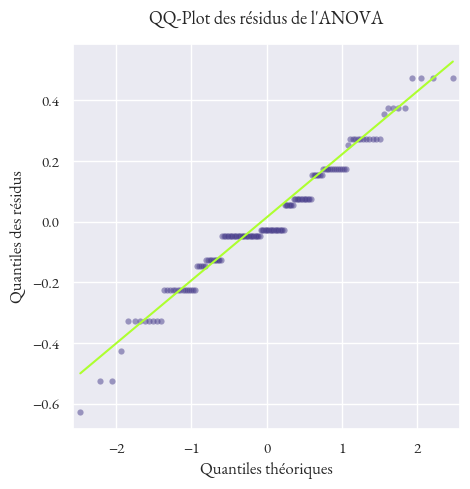

In [200]:
# QQPlot des résidus de l'ANOVA 

# Création de la figure :
fig, ax = plt.subplots(figsize = (5, 5))

# QQ-plot des résidus pour vérifier la normalité :
sm.qqplot(residuals, 
          line = 'q', 
          ax = ax)

# Ajout du titre :
ax.set_title('QQ-Plot des résidus de l\'ANOVA', fontsize = 13, pad = 15)

# Personnalisation des axes :
ax.set_xlabel('Quantiles théoriques')
ax.set_ylabel('Quantiles des résidus')

# Modification de la couleur et de la transparence des points :
ax.get_lines()[0].set_markerfacecolor('darkslateblue')
ax.get_lines()[0].set_alpha(0.5)
ax.get_lines()[0].set_markersize(4.5)

# Ajout d'une bordure autour des points :
ax.get_lines()[0].set_markeredgecolor('white')
ax.get_lines()[0].set_markeredgewidth(0.05)

# Modification de la couleur de la ligne de régression :
ax.get_lines()[1].set_color('greenyellow')

# Affichage du graphique :
plt.show()

In [201]:
# Test de l'homogénéité des variances (Test de Levene) :

# On groupe les données de 'petal_width' par espèce :
grouped = [iris[iris['variety'] == variety]['petal_width'] for variety in iris['variety'].unique()]

# On effectue le test de Levene :
stat, p_value = levene(*grouped)

# Affichage des résultats :
print(f"Statistique de Levene : {stat:.2f}, p-valeur : {p_value:.3f}")

# Conclusion en fonction de la p-value :
if p_value < 0.05:
    print("Les variances ne sont pas homogènes : hypothèse d'homoscédasticité rejetée.")
else:
    print("Les variances sont homogènes : hypothèse d'homoscédasticité validée.")

Statistique de Levene : 19.89, p-valeur : 0.000
Les variances ne sont pas homogènes : hypothèse d'homoscédasticité rejetée.


In [202]:
# Calcul des valeurs ajustées :
predictions = model.fittedvalues

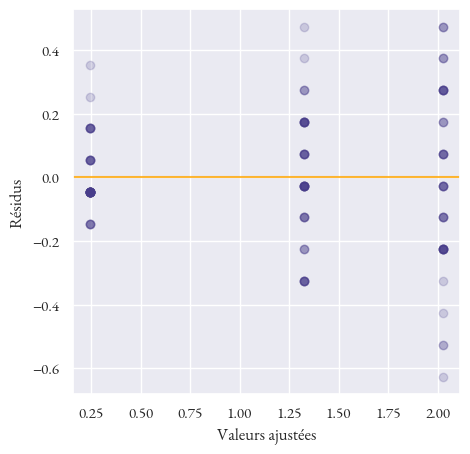

In [203]:
# Test de l'hétéroscédasticité :

# Tracé des résidus vs valeurs ajustées :
fig, ax = plt.subplots(figsize = (5, 5))

# Tracer les points de résidus vs valeurs ajustées :
ax.scatter(predictions, 
           residuals,
           color = 'darkslateblue',
           alpha = 0.2)

# Ligne à 0 pour visualiser les résidus :
ax.axhline(0, 
           color = 'orange', 
           linestyle = '-',
           alpha = 0.8)

# Ajout des étiquettes aux axes :
ax.set_xlabel('Valeurs ajustées')
ax.set_ylabel('Résidus')

# Affichage du graphique :
plt.show()

> QQ-plot : Les points suivent bien la ligne, ce qui suggère que les résidus suivent une distribution normale. Cela indique que l'hypothèse de normalité des résidus est raisonnable pour ce modèle.

> Statistique de Levene (19.89, p-valeur = 0.000) : Le test de Levene évalue l'égalité des variances entre les groupes. Une p-valeur aussi faible (inférieure à 0.05) indique que l'hypothèse d'égalité des variances est rejetée. En d'autres termes, les variances entre les groupes ne sont pas homogènes (l'hypothèse d'homoscédasticité est rejetée).

> Test d'hétéroscédasticité (dispersion des points) : En observant le nuage de points dans un graphique de résidus contre les valeurs prédites, on constate que les points s'élargissent en allant vers la droite, ce qui est un signe typique d'hétéroscédasticité. Cela signifie que la variance des résidus augmente avec les valeurs prédite, ce qui pourrait violer l'une des hypothèses des modèles de régression linéaire.

> En conclusion :  Les résultats de l'analyse des résidus suggèrent que l'hypothèse de normalité a été acceptée, les résidus suivant une distribution normale (QQ-plot). Cependant, l'hypothèse d'homoscédasticité a été rejetée, indiquant des variances inégales entre les groupes, comme l'indique le test de Levene (p < 0.001) et la dispersion des résidus du modèle.

> Dans ce cas précis, l'utilisation de l'ANOVA pour tester la différence de la largeur du pétale en fonction des espèces était raisonnable à première vue, car l'ANOVA est conçue pour comparer les moyennes de plusieurs groupes. Cependant, les résultats montrent que l'hypothèse d'homoscédasticité (variance égale entre les groupes) a été rejetée, ce qui viole une des hypothèses clés de l'ANOVA. Par conséquent, l'ANOVA n'est peut-être pas la méthode la plus appropriée dans ce cas, car elle peut conduire à des conclusions erronées.

> Le test de Kruskal-Wallis est le test non paramétrique équivalent de l'ANOVA à un facteur. Il permet de comparer les distributions de plusieurs groupes, mais contrairement à l'ANOVA, il ne fait aucune hypothèse sur la forme de la distribution des données ni sur l'homogénéité des variances.

## 3. Le jeu de données sur un MOOC

### 3.1. Préparation du jeu de données

In [204]:
# Chargement des fichiers CSV pour les questionnaires :
effect1_quest = pd.read_csv("dataset1a.csv", sep = ",", encoding = "latin1", engine = "python", decimal = ",")
effect2_quest = pd.read_csv("dataset2a.csv", sep = ",", encoding = "latin1", engine = "python", decimal = ",")
effect3_quest = pd.read_csv("dataset3a.csv", sep = ",", encoding = "latin1", engine = "python", decimal = ",")

In [205]:
# Affichage du dataframe "effect1_quest" :
effect1_quest.head(3)

,Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,...,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,encad.diffic,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin
0,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19178,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,TH,TH,Cadres et professions intellectuelles,Moins de deux heures
2,1086,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,TH,TH,"Artisans, commerçants, chefs d'entreprise",Moins de deux heures


In [206]:
# Affichage du dataframe "effect2_quest" :
effect2_quest.head(3)

,Student_ID,Current.Score,Section,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,...,Eval.diffic,Estimated.hours,Part.labo,Plat.satisf,Peer.eval.relev,Country_HDI,Country_HDI.fin,CSP.fin,Temps.dispo.fin,EMLyon.et
0,32360,NaN,"Laboratoire, Effectuation #2",une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences humaines (histoire\, archéologie\, ph...",Cadres et professions intellectuelles,par un ami ou une connaissance,...,Très facile,De 1 à 2 heures,"Oui\, j'ai soumis un projet en tant que Porteu...",Satisfaisante,5,TH,TH,Cadres et professions intellectuelles,Moins de deux heures,0.0
1,27582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,27808,NaN,Effectuation #2,un homme,1986.0,Haïti,Bac+3 (Licence ou équivalent),Management/Gestion d entreprise,En recherche d'emploi,autre,...,Moyen,Plus de 8 heures,"Oui\, je suis devenu Coach sur au moins un pro...",Très satisfaisante,5,B,B,En recherche d'emploi,Entre quatre et six heures,0.0


In [207]:
# Affichage du dataframe "effect3_quest" :
effect3_quest.head(3)

,Student_ID,Certif.bin,Section,Gender,birth.year,Country,Diploma,EMLYON.et,Formation,CSP,...,Incitation,Temps.Dispo,Exp.MOOC,Completion.proba,EMLyon,Country_HDI,Country_HDI.fin,age,CSP.fin,Temps.dispo.fin
0,68029.0,1.0,MOOC Effectuation #3,un homme,1982.0,France,Bac+5 (Master ou équivalent),Non,"Mathématiques\, informatique","Artisans, commerÃ§ants, chefs d'entreprise",...,1.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5.0,Non,TH,TH,31.0,"Artisans, commerÃ§ants, chefs d'entreprise",Entre deux et quatre heures
1,66198.0,1.0,"Laboratoire, Laboratoire Effectuation #3, MOOC...",un homme,1994.0,Maroc,"Bac+2 (Deug, IUT, BTS ou équivalent)",Non,"Sciences sociales (économie\, sciences politiq...",Etudiants,...,4.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",5.0,Non,H,H&M,19.0,Etudiants,Entre deux et quatre heures
2,68052.0,1.0,MOOC Effectuation #3,un homme,1988.0,Maroc,Bac+5 (Master ou équivalent),Oui,"Mathématiques\, informatique",Cadres et professions intellectuelles,...,4.0,Entre deux et quatre heures,"Non, c'est ma première participation Ã un MOOC",4.0,Oui,H,H&M,25.0,Cadres et professions intellectuelles,Entre deux et quatre heures


In [208]:
# Chargement des fichiers CSV pour les logs :
usages_effec1 = pd.read_csv("dataset1b.csv", sep = ",", encoding = "latin1", engine = "python", decimal = ",")
usages_effec2 = pd.read_csv("dataset2b.csv", sep = ",", encoding = "latin1", engine = "python", decimal = ",")
usages_effec3 = pd.read_csv("dataset3b.csv", sep = ",", encoding = "latin1", engine = "python", decimal = ",")

In [209]:
# Affichage de "usages_effec1" :
usages_effec1.head(3)
print(usages_effec1.columns)

Index(['Student_ID', 'Exam.score', 'Exam.bin', 'Assignment.score',
       'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin', 'Quizz.2.score',
       'Quizz.2.bin', 'Quizz.3.score', 'Quizz.3.bin', 'Quizz.4.bin',
       'Quizz.4.score', 'Quizz.5.bin', 'Quizz.5.score', 'Intro.MOOC',
       'Prez.sem.1', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6',
       'Prez.sem.2', 'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6',
       'Prez.sem.3', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5',
       'Prez.sem.4', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5',
       'Prez.sem.5', 'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5',
       'Post.forum.0', 'view.forum.0', 'Post.forum.1', 'Post.forum.1.2',
       'view.forum.1', 'view.forum.1.2', 'Post.forum.2', 'Post.forum.2.2',
       'view.forum.2', 'view.forum.2.2', 'Post.forum.3', 'view.forum.3',
       'Post.forum.4', 'Post.forum.4.2', 'view.forum.4', 'view.forum.4.2',
       'Post.forum.5', 'Post.forum.5.

In [210]:
# Affichage de "usages_effec2" :
usages_effec2.head(3)

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,Post.forum.4.2,view.forum.4,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice
0,15,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,1,0,0,0,0,0,3,0,0
1,26,NaN,0,NaN,0,20.0,1,NaN,0,NaN,...,0,0,0,0,0,0,0,3,1,0
2,151,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0


In [211]:
# Affichage de "usages_effec3" :
usages_effec3.head(3)

,Student_ID,Exam.score,Exam.bin,Assignment.score,Assignment.bin,Quizz.1.score,Quizz.1.bin,Quizz.2.score,Quizz.2.bin,Quizz.3.score,...,view.forum.4.2,Post.forum.5,Post.forum.5.2,view.forum.5,view.forum.5.2,last.video,last.quizz,Assignment.choice,Post.forum.fonc.cours,view.forum.fonc.cours
0,15,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,2,0,0,0,0
1,34,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2,88,NaN,0,NaN,0,NaN,0,NaN,0,NaN,...,0,0,0,0,0,2,0,0,0,0


In [212]:
# Affichage des noms de colonnes des DataFrames de questionnaires :
print("Colonnes de effect1_quest :", effect1_quest.columns.tolist())
print("Colonnes de effect2_quest :", effect2_quest.columns.tolist())
print("Colonnes de effect3_quest :", effect3_quest.columns.tolist())

Colonnes de effect1_quest : ['Student_ID', 'Gender', 'birth.year', 'Country', 'Diploma', 'Formation', 'CSP', 'How.heard', 'Exp.crea', 'Curiosity.MOOC', 'Certif.self.sat', 'Rencontres', 'Certif.work', 'Incitation', 'Temps.Dispo', 'Exp.MOOC', 'Completion.proba', 'Instit.brand', 'motiv.princ', 'diffic', 'encad.disp', 'How.contact', 'entour', 'entour.inter', 'Satisf', 'Eval.diffic', 'Estimated.hours', 'Part.labo', 'Plat.satisf', 'Peer.eval.relev', 'encad.diffic', 'Country_HDI', 'Country_HDI.fin', 'CSP.fin', 'Temps.dispo.fin']
Colonnes de effect2_quest : ['Student_ID', 'Current.Score', 'Section', 'Gender', 'birth.year', 'Country', 'Diploma', 'Formation', 'CSP', 'How.heard', 'Exp.crea', 'Curiosity.MOOC', 'Certif.self.sat', 'Rencontres', 'Certif.work', 'Incitation', 'Mot', 'Temps.Dispo', 'Exp.MOOC', 'Completion.proba', 'EMLyon', 'Instit.brand', 'motiv.princ', 'diffic', 'encad.disp', 'How.contact', 'entour', 'entour.inter', 'Satisf', 'Proba.reco', 'Eval.diffic', 'Estimated.hours', 'Part.labo',

In [213]:
# Affichage des noms de colonnes des DataFrames de logs :
print("Colonnes de usages_effec1 :", usages_effec1.columns.tolist())
print("Colonnes de usages_effec2 :", usages_effec2.columns.tolist())
print("Colonnes de usages_effec3 :", usages_effec3.columns.tolist())

Colonnes de usages_effec1 : ['Student_ID', 'Exam.score', 'Exam.bin', 'Assignment.score', 'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin', 'Quizz.2.score', 'Quizz.2.bin', 'Quizz.3.score', 'Quizz.3.bin', 'Quizz.4.bin', 'Quizz.4.score', 'Quizz.5.bin', 'Quizz.5.score', 'Intro.MOOC', 'Prez.sem.1', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'Prez.sem.2', 'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6', 'Prez.sem.3', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5', 'Prez.sem.4', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5', 'Prez.sem.5', 'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5', 'Post.forum.0', 'view.forum.0', 'Post.forum.1', 'Post.forum.1.2', 'view.forum.1', 'view.forum.1.2', 'Post.forum.2', 'Post.forum.2.2', 'view.forum.2', 'view.forum.2.2', 'Post.forum.3', 'view.forum.3', 'Post.forum.4', 'Post.forum.4.2', 'view.forum.4', 'view.forum.4.2', 'Post.forum.5', 'Post.forum.5.2', 'view.forum.5', 'view.forum.5.2', 'last.video', 'last.quizz']
Col

In [214]:
# Fusion des DataFrames questionnaires et logs pour chaque itération sur 'Student_ID' (column bind):
merged1 = pd.merge(effect1_quest, usages_effec1, on = 'Student_ID', how = 'left')
merged1['iteration'] = 1
merged2 = pd.merge(effect2_quest, usages_effec2, on = 'Student_ID', how = 'left')
merged2['iteration'] = 2
merged3 = pd.merge(effect3_quest, usages_effec3, on = 'Student_ID', how = 'left')
merged3['iteration'] = 3

In [215]:
# Affichage des noms de colonnes des tableaux obtenus :
print("Colonnes de merged1 :", merged1.columns.tolist())
print("Colonnes de merged2 :", merged2.columns.tolist())
print("Colonnes de merged3 :", merged3.columns.tolist())

Colonnes de merged1 : ['Student_ID', 'Gender', 'birth.year', 'Country', 'Diploma', 'Formation', 'CSP', 'How.heard', 'Exp.crea', 'Curiosity.MOOC', 'Certif.self.sat', 'Rencontres', 'Certif.work', 'Incitation', 'Temps.Dispo', 'Exp.MOOC', 'Completion.proba', 'Instit.brand', 'motiv.princ', 'diffic', 'encad.disp', 'How.contact', 'entour', 'entour.inter', 'Satisf', 'Eval.diffic', 'Estimated.hours', 'Part.labo', 'Plat.satisf', 'Peer.eval.relev', 'encad.diffic', 'Country_HDI', 'Country_HDI.fin', 'CSP.fin', 'Temps.dispo.fin', 'Exam.score', 'Exam.bin', 'Assignment.score', 'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin', 'Quizz.2.score', 'Quizz.2.bin', 'Quizz.3.score', 'Quizz.3.bin', 'Quizz.4.bin', 'Quizz.4.score', 'Quizz.5.bin', 'Quizz.5.score', 'Intro.MOOC', 'Prez.sem.1', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'Prez.sem.2', 'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6', 'Prez.sem.3', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5', 'Prez.sem.4', 'S4.L1.1', 'S4.L1.

In [216]:
# Affichage des valeurs uniques dans la colonne 'iteration' :
print("Valeurs uniques de 'iteration' dans le dataframe merged1 :", merged1['iteration'].unique())
print("Valeurs uniques de 'iteration' dans le dataframe merged2 :", merged2['iteration'].unique())
print("Valeurs uniques de 'iteration' dans le dataframe merged3 :", merged3['iteration'].unique())

Valeurs uniques de 'iteration' dans le dataframe merged1 : [1]
Valeurs uniques de 'iteration' dans le dataframe merged2 : [2]
Valeurs uniques de 'iteration' dans le dataframe merged3 : [3]


In [217]:
# Fusion des DataFrames de chaque itération (row bind) :
final_merged = pd.concat([merged1, merged2, merged3], 
                         ignore_index = True, 
                         sort = False)
final_merged.head(3)

,Student_ID,Gender,birth.year,Country,Diploma,Formation,CSP,How.heard,Exp.crea,Curiosity.MOOC,...,Mot,EMLyon,Proba.reco,EMLyon.et,Assignment.choice,Certif.bin,EMLYON.et,age,Post.forum.fonc.cours,view.forum.fonc.cours
0,221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19178.0,une femme,1986.0,France,Bac+5 (Master ou équivalent),Droit,Cadres et professions intellectuelles,par un article ou un blog sur Internet,Je n'ai aucune expérience en création d'entrep...,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1086.0,une femme,1967.0,France,Bac+5 (Master ou équivalent),"Sciences sociales (économie\, sciences politiq...","Artisans, commerçants, chefs d'entreprise",par une communication de l'EMLYON,Je suis en train de créer mon entreprise (phas...,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
# Affichage des noms de colonnes pour le DataFrame final :
print(final_merged.columns.tolist())

['Student_ID', 'Gender', 'birth.year', 'Country', 'Diploma', 'Formation', 'CSP', 'How.heard', 'Exp.crea', 'Curiosity.MOOC', 'Certif.self.sat', 'Rencontres', 'Certif.work', 'Incitation', 'Temps.Dispo', 'Exp.MOOC', 'Completion.proba', 'Instit.brand', 'motiv.princ', 'diffic', 'encad.disp', 'How.contact', 'entour', 'entour.inter', 'Satisf', 'Eval.diffic', 'Estimated.hours', 'Part.labo', 'Plat.satisf', 'Peer.eval.relev', 'encad.diffic', 'Country_HDI', 'Country_HDI.fin', 'CSP.fin', 'Temps.dispo.fin', 'Exam.score', 'Exam.bin', 'Assignment.score', 'Assignment.bin', 'Quizz.1.score', 'Quizz.1.bin', 'Quizz.2.score', 'Quizz.2.bin', 'Quizz.3.score', 'Quizz.3.bin', 'Quizz.4.bin', 'Quizz.4.score', 'Quizz.5.bin', 'Quizz.5.score', 'Intro.MOOC', 'Prez.sem.1', 'S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 'Prez.sem.2', 'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6', 'Prez.sem.3', 'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5', 'Prez.sem.4', 'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 

In [219]:
# Conservation uniquement des colonnes 'Country_HDI' et 'Gender' :
final_merged[['Student_ID', 'Country_HDI', 'Gender']].head(3)

,Student_ID,Country_HDI,Gender
0,221.0,NaN,NaN
1,19178.0,TH,une femme
2,1086.0,TH,une femme


In [220]:
# Sélection des colonnes des vidéos :
colonnes_video = ['S1.L1', 'S1.L2', 'S1.L3', 'S1.L4', 'S1.L5', 'S1.L6', 
                  'S2.L1', 'S2.L2', 'S2.L3', 'S2.L4', 'S2.L5', 'S2.L6',
                  'S3.L1.1', 'S3.L1.2', 'S3.L2', 'S3.L3', 'S3.L4', 'S3.L5',
                  'S4.L1.1', 'S4.L1.2', 'S4.L2', 'S4.L3', 'S4.L4', 'S4.L5',
                  'S5.L1.1', 'S5.L1.2', 'S5.L2', 'S5.L3', 'S5.L4', 'S5.L5']

In [221]:
# Sélection des colonnes des quiz :
colonnes_quiz = ['Quizz.1.bin', 
                 'Quizz.2.bin', 
                 'Quizz.3.bin', 
                 'Quizz.4.bin', 
                 'Quizz.5.bin']

In [222]:
# Calcul de la somme des vidéos vues pour chaque étudiant :
final_merged = final_merged.copy()
final_merged['videos_vues'] = final_merged[colonnes_video].sum(axis = 1, skipna = True)

In [223]:
# Calcul de la somme des quiz réalisés pour chaque étudiant :
final_merged['quiz_realises'] = final_merged[colonnes_quiz].sum(axis = 1, skipna = True)

In [224]:
# Sélection des colonnes du dataframe 'final_merged' :
final_merged[['Student_ID', 'Country_HDI', 'Gender', 'videos_vues', 'quiz_realises']].head(3)

,Student_ID,Country_HDI,Gender,videos_vues,quiz_realises
0,221.0,NaN,NaN,0.0,0.0
1,19178.0,TH,une femme,1.0,0.0
2,1086.0,TH,une femme,30.0,4.0


In [225]:
# Décompte des occurrences de chaque catégorie dans'Country_HDI' :
hdi_counts = final_merged['Country_HDI'].value_counts()
hdi_counts

Country_HDI
TH    7270
B     1032
H      354
M      313
Name: count, dtype: int64

In [226]:
# Création d'une nouvelle colonne 'HDI_grouped' où M et H sont regroupés sous 'I' :
final_merged['HDI_grouped'] = final_merged['Country_HDI'].replace({'M': 'I',
                                                                   'H': 'I',
                                                                   'B': 'B',
                                                                   'TH': 'TH'})

# Affichage du tableau simplifié :
final_merged[['Student_ID', 'HDI_grouped', 'Gender', 'videos_vues', 'quiz_realises']].head(3)

,Student_ID,HDI_grouped,Gender,videos_vues,quiz_realises
0,221.0,NaN,NaN,0.0,0.0
1,19178.0,TH,une femme,1.0,0.0
2,1086.0,TH,une femme,30.0,4.0


In [227]:
# Décompte du nombre d'occurrences dans la nouvelle colonne 'HDI_grouped' :
new_hdi_counts = final_merged['HDI_grouped'].value_counts()
new_hdi_counts

HDI_grouped
TH    7270
B     1032
I      667
Name: count, dtype: int64

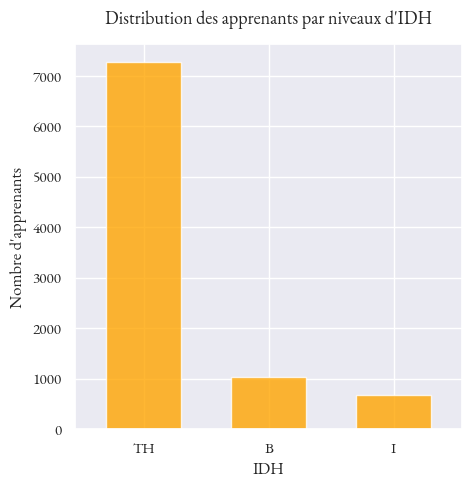

In [228]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du barplot :
new_hdi_counts.plot(kind = 'bar', 
                    color = 'orange', 
                    alpha = 0.8, 
                    edgecolor = 'white', 
                    width = 0.6)

# Ajout d'un titre au graphique :
plt.title("Distribution des apprenants par niveaux d'IDH", 
          fontsize = 13, 
          pad = 15)

# Personnalisation des axes :
plt.xlabel("IDH")
plt.ylabel("Nombre d'apprenants")

# Personnalisation des graduations de l'axe des x :
plt.xticks(rotation = 0)

# Affichage du graphique :
plt.show()

### 3.2. Une taxonomie d'apprenants

In [229]:
# Création de la variable 'Complete.bin' :
final_merged['Complete.bin'] = np.where((final_merged['Exam.bin'] == 1) | (final_merged['Assignment.bin'] == 1), 1, 0)
final_merged[['Student_ID', 
              'HDI_grouped', 
              'Gender', 
              'videos_vues', 
              'quiz_realises', 
              'Assignment.bin', 
              'Exam.bin', 
              'Complete.bin']].head(3)

,Student_ID,HDI_grouped,Gender,videos_vues,quiz_realises,Assignment.bin,Exam.bin,Complete.bin
0,221.0,NaN,NaN,0.0,0.0,0.0,0.0,0
1,19178.0,TH,une femme,1.0,0.0,0.0,0.0,0
2,1086.0,TH,une femme,30.0,4.0,0.0,0.0,0


In [230]:
# Création de la condition pour attribuer 'Completer' :
final_merged.loc[final_merged['Complete.bin'] == 1, 'Learner.type'] = 'Completer'

In [231]:
# Création de la condition pour attribuer 'Disengaging' :
final_merged.loc[(final_merged['Complete.bin'] == 0) & (final_merged['Quizz.1.bin'] >= 1), 'Learner.type'] = 'Disengaging'

In [232]:
# Création de la condition pour attribuer 'Auditing' :
final_merged.loc[(final_merged['Assignment.bin'] == 0) & 
                 (final_merged['quiz_realises'] == 0) & 
                 (final_merged['videos_vues'] >= 6), 'Learner.type'] = 'Auditing'

In [233]:
# Création de la condition pour attribuer 'Bystander' :
final_merged.loc[(final_merged['Assignment.bin'] == 0) & 
                 (final_merged['quiz_realises'] == 0) & 
                 (final_merged['videos_vues'] < 6), 'Learner.type'] = 'Bystander'

In [234]:
# Affichage des valeurs uniques dans la colonne 'Certif.bin' :
print(final_merged['Certif.bin'].unique())

[nan  1.  0.]


In [235]:
# Proportion des valeurs uniques dans la colonne 'Certif.bin' :
proportions = final_merged['Certif.bin'].value_counts(normalize = True, dropna = False)

# Arrondir les proportions à 2 décimales :
proportions = proportions.round(2)
proportions

Certif.bin
NaN    0.78
0.0    0.18
1.0    0.04
Name: proportion, dtype: float64

In [236]:
# Création de la variable 'Exam_certif' (=obtention du certificat et/ou réalisation de l’examen final):
final_merged['Exam_Certif.bin'] = np.where((final_merged['Exam.bin'] == 1) | (final_merged['Certif.bin'] == 1), 1, 0)
final_merged['Exam_Certif.bin'] = np.where((final_merged['Exam.bin'] == 1) | (final_merged['Certif.bin'] == 1),1, np.where(final_merged['Certif.bin'].isna() & (final_merged['Exam.bin'] == 0), np.nan, 0))

In [237]:
# Vérification du résultat obtenu :
resultats_MOOC = final_merged[['Student_ID', 
                               'HDI_grouped', 
                               'Gender', 
                               'videos_vues', 
                               'quiz_realises', 
                               'Exam.bin', 
                               'Assignment.bin', 
                               'Complete.bin', 
                               'Exam_Certif.bin', 
                               'Learner.type', 
                               'iteration']]
resultats_MOOC.head(5)

,Student_ID,HDI_grouped,Gender,videos_vues,quiz_realises,Exam.bin,Assignment.bin,Complete.bin,Exam_Certif.bin,Learner.type,iteration
0,221.0,NaN,NaN,0.0,0.0,0.0,0.0,0,NaN,Bystander,1
1,19178.0,TH,une femme,1.0,0.0,0.0,0.0,0,NaN,Bystander,1
2,1086.0,TH,une femme,30.0,4.0,0.0,0.0,0,NaN,Disengaging,1
3,1948.0,TH,une femme,1.0,0.0,0.0,0.0,0,NaN,Bystander,1
4,16209.0,B,une femme,0.0,5.0,0.0,0.0,0,NaN,Disengaging,1


In [238]:
# Affichage des informations sur le tableau :
print(resultats_MOOC.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17297 entries, 0 to 17296
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student_ID       16947 non-null  float64
 1   HDI_grouped      8969 non-null   object 
 2   Gender           9099 non-null   object 
 3   videos_vues      17297 non-null  float64
 4   quiz_realises    17297 non-null  float64
 5   Exam.bin         15182 non-null  float64
 6   Assignment.bin   15182 non-null  float64
 7   Complete.bin     17297 non-null  int64  
 8   Exam_Certif.bin  6526 non-null   float64
 9   Learner.type     15119 non-null  object 
 10  iteration        17297 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.5+ MB
None


In [239]:
# Affichage du nombre de lignes :
print(f"Nombre de lignes : {resultats_MOOC.shape[0]}")

Nombre de lignes : 17297


In [240]:
# Calcul du pourcentage de données manquantes
missing_percentage = resultats_MOOC.isnull().mean() * 100

# Affichage des résultats
print(missing_percentage.round(0))

Student_ID          2.0
HDI_grouped        48.0
Gender             47.0
videos_vues         0.0
quiz_realises       0.0
Exam.bin           12.0
Assignment.bin     12.0
Complete.bin        0.0
Exam_Certif.bin    62.0
Learner.type       13.0
iteration           0.0
dtype: float64


In [241]:
# Tri du dataframe resultats_MOOC sur 'HDI_grouped' :
resultats_MOOC_sorted = resultats_MOOC.sort_values('HDI_grouped')

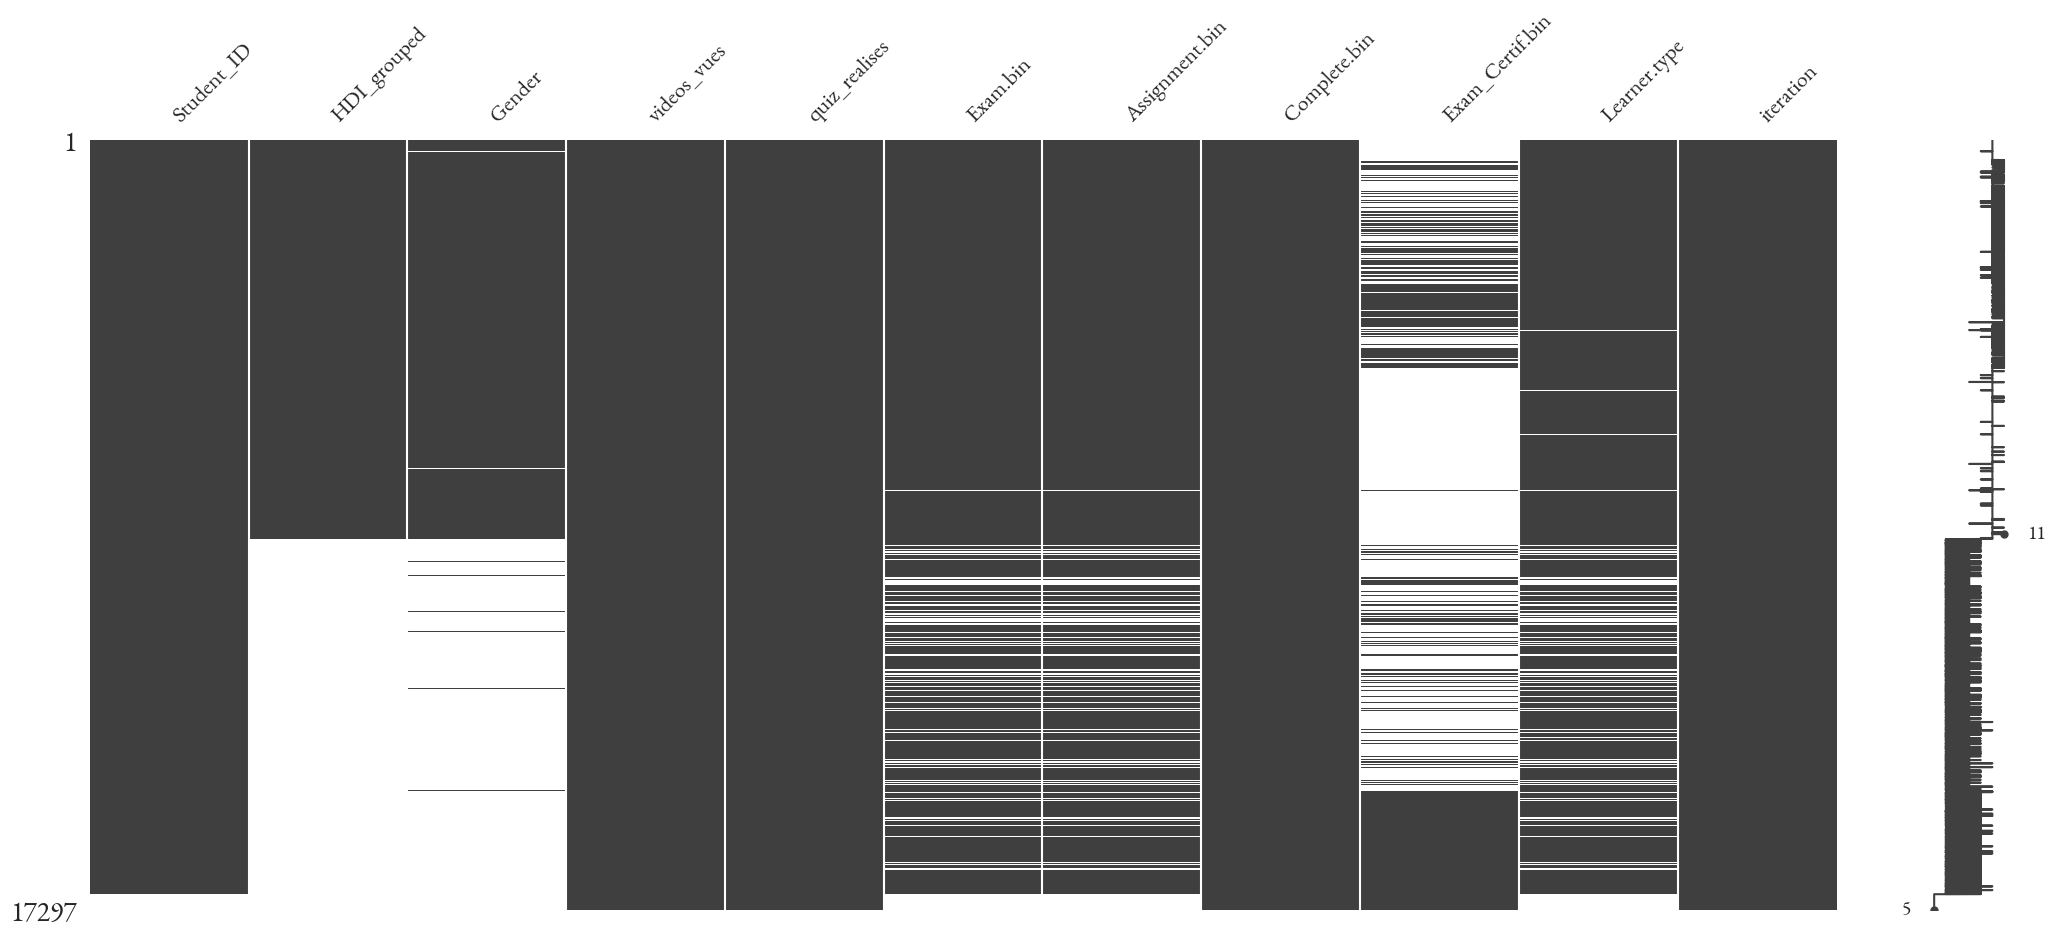

In [242]:
# Affichage de la matrice de nullité :
msno.matrix(resultats_MOOC_sorted)

# Affichage du graphique :
plt.show()

In [243]:
# Suppression des lignes où la valeur de 'HDI_grouped' est manquante :
resultats_MOOC = resultats_MOOC_sorted.dropna(subset = ['HDI_grouped'])

In [244]:
# Calcul du nombre de valeurs manquantes pour chaque colonne :
missing_values_count = resultats_MOOC.isnull().sum()

# Affichage du nombre de valeurs manquantes :
print(f"Le nombre de valeurs manquantes pour chaque colonne est :\n{missing_values_count}")

Le nombre de valeurs manquantes pour chaque colonne est :
Student_ID            0
HDI_grouped           0
Gender               12
videos_vues           0
quiz_realises         0
Exam.bin              6
Assignment.bin        6
Complete.bin          0
Exam_Certif.bin    6538
Learner.type         33
iteration             0
dtype: int64


In [245]:
# Suppression des lignes où la colonne 'Gender' contient des valeurs NaN :
resultats_MOOC = resultats_MOOC.dropna(subset = ['Gender'])
resultats_MOOC = resultats_MOOC.dropna(subset = ['Learner.type'])

In [246]:
# Affichage du nombre de lignes :
print(f"Nombre de lignes : {resultats_MOOC.shape[0]}")

Nombre de lignes : 8924


In [247]:
# Calcul du nombre de valeurs manquantes pour chaque colonne :
missing_values_count = resultats_MOOC.isnull().sum()

# Affichage du nombre de valeurs manquantes :
print(f"Le nombre de valeurs manquantes pour chaque colonne est :\n{missing_values_count}")

Le nombre de valeurs manquantes pour chaque colonne est :
Student_ID            0
HDI_grouped           0
Gender                0
videos_vues           0
quiz_realises         0
Exam.bin              0
Assignment.bin        0
Complete.bin          0
Exam_Certif.bin    6506
Learner.type          0
iteration             0
dtype: int64


> Le nombre de valeurs manquantes dans la colonne 'Exam_Certif.bin' est trop élevé pour envisager une suppression.

> Lors de l'utilisation de cette variable spécifique, le tableau sera filtré pour s'appliquer sur une plus petite portion de l'échantillon.

In [248]:
# Recherche des doublons complets dans toutes les colonnes :
duplicates_in_full_row = resultats_MOOC[resultats_MOOC.duplicated(keep = False)]

In [249]:
# Affichage du nombre de doublons complets :
num_duplicates = duplicates_in_full_row.shape[0]
print(f"Le nombre de doublons complets est de : {num_duplicates}")

Le nombre de doublons complets est de : 0


In [250]:
# Vérification des types de données des colonnes :
print(resultats_MOOC.dtypes)

Student_ID         float64
HDI_grouped         object
Gender              object
videos_vues        float64
quiz_realises      float64
Exam.bin           float64
Assignment.bin     float64
Complete.bin         int64
Exam_Certif.bin    float64
Learner.type        object
iteration            int64
dtype: object


In [251]:
# Vérification si des valeurs dans 'Student_ID' ont un chiffre après la virgule :
has_decimal_part = resultats_MOOC['Student_ID'] % 1 != 0

In [252]:
# Calcul du nombre de valeurs avec un chiffre après la virgule :
num_values_with_decimal = has_decimal_part.sum()
print(f"Le nombre de valeurs dont le chiffre après la virgule diffère de 0 est : {num_values_with_decimal}")

Le nombre de valeurs dont le chiffre après la virgule diffère de 0 est : 0


In [253]:
# Conversion de la colonne 'Student_ID' en type entier :
resultats_MOOC['Student_ID'] = resultats_MOOC['Student_ID'].astype(int)

In [254]:
# Affichage des valeurs uniques des différentes colonnes :
print("Les valeurs uniques prises par 'videos_vues' sont :", resultats_MOOC['videos_vues'].unique())
print("Les valeurs uniques prises par 'quiz_realises' sont :", resultats_MOOC['quiz_realises'].unique())
print("Les valeurs uniques prises par 'Exam.bin' sont :", resultats_MOOC['Exam.bin'].unique())
print("Les valeurs uniques prises par 'Assignment.bin' sont :", resultats_MOOC['Assignment.bin'].unique())
print("Les valeurs uniques prises par 'HDI_grouped' sont :", resultats_MOOC['HDI_grouped'].unique())
print("Les valeurs uniques prises par 'Gender' sont :", resultats_MOOC['Gender'].unique())
print("Les valeurs uniques prises par 'Learner.type' sont :", resultats_MOOC['Learner.type'].unique())
print("Les valeurs uniques prises par 'iteration' sont :", resultats_MOOC['iteration'].unique())

Les valeurs uniques prises par 'videos_vues' sont : [ 0.  1.  4.  6.  2.  3. 13. 11.  7.  9.  8. 24. 30. 18. 25. 26. 29. 16.
 12. 19.  5. 21. 20. 10. 28. 17. 15. 23. 14. 27. 22.]
Les valeurs uniques prises par 'quiz_realises' sont : [5. 0. 3. 1. 2. 4.]
Les valeurs uniques prises par 'Exam.bin' sont : [0. 1.]
Les valeurs uniques prises par 'Assignment.bin' sont : [1. 0.]
Les valeurs uniques prises par 'HDI_grouped' sont : ['B' 'I' 'TH']
Les valeurs uniques prises par 'Gender' sont : ['un homme' 'une femme']
Les valeurs uniques prises par 'Learner.type' sont : ['Completer' 'Bystander' 'Disengaging' 'Auditing']
Les valeurs uniques prises par 'iteration' sont : [1 3 2]


In [255]:
# Remplacement des valeurs de la colonne 'Gender' :
resultats_MOOC['Gender'] = resultats_MOOC['Gender'].replace({'un homme': 'Homme', 
                                                             'une femme': 'Femme'})

In [256]:
# Conversion de la colonne 'Learner.type' en type 'catégorie' :
resultats_MOOC['Learner.type'] = resultats_MOOC['Learner.type'].astype('category')

In [257]:
# Conversion de la colonne 'videos_vues' en type 'integer' :
resultats_MOOC['videos_vues'] = resultats_MOOC['videos_vues'].astype(int)

In [258]:
# Conversion de la colonne 'quiz_realises' en type 'integer' :
resultats_MOOC['quiz_realises'] = resultats_MOOC['quiz_realises'].astype(int)

In [259]:
# Conversion de la colonne 'Exam.bin' en type 'integer' :
resultats_MOOC['Exam.bin'] = resultats_MOOC['Exam.bin'].astype(int)

In [260]:
# Conversion de la colonne 'Assignment.bin' en type 'integer' :
resultats_MOOC['Assignment.bin'] = resultats_MOOC['Assignment.bin'].astype(int)

In [261]:
# Vérification des types de données des colonnes :
print(resultats_MOOC.dtypes)

Student_ID            int64
HDI_grouped          object
Gender               object
videos_vues           int64
quiz_realises         int64
Exam.bin              int64
Assignment.bin        int64
Complete.bin          int64
Exam_Certif.bin     float64
Learner.type       category
iteration             int64
dtype: object


In [262]:
# Affichage du dataframe après nettoyage des données :
resultats_MOOC.head(3)

,Student_ID,HDI_grouped,Gender,videos_vues,quiz_realises,Exam.bin,Assignment.bin,Complete.bin,Exam_Certif.bin,Learner.type,iteration
7650,5846,B,Homme,0,5,0,1,1,NaN,Completer,1
5964,13987,B,Homme,0,0,0,0,0,NaN,Bystander,1
5960,18294,B,Homme,0,0,0,0,0,NaN,Bystander,1


In [263]:
# Calcul des valeurs minimales et maximales pour 'videos_vues' :
min_videos_vues = resultats_MOOC['videos_vues'].min()
max_videos_vues = resultats_MOOC['videos_vues'].max()

In [264]:
# Calcul des valeurs minimales et maximales pour 'quiz_realises' :
min_quiz_realises = resultats_MOOC['quiz_realises'].min()
max_quiz_realises = resultats_MOOC['quiz_realises'].max()

In [265]:
# Affichage des résultats :
print(f"Min videos_vues : {min_videos_vues}, Max videos_vues : {max_videos_vues}")
print(f"Min quiz_realises : {min_quiz_realises}, Max quiz_realises : {max_quiz_realises}")

Min videos_vues : 0, Max videos_vues : 30
Min quiz_realises : 0, Max quiz_realises : 5


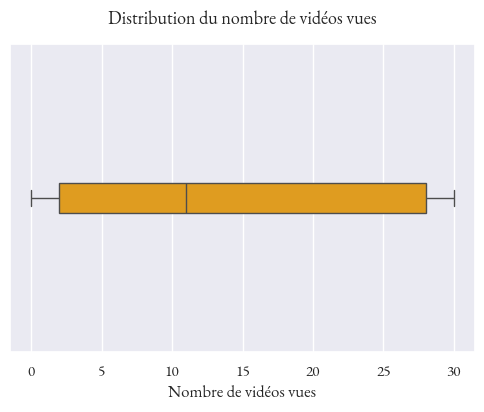

In [266]:
# Création de la figure :
plt.figure(figsize = (6, 4))

# Création du boxplot :
sns.boxplot(x = resultats_MOOC['videos_vues'], 
            orient = 'h', 
            width = 0.1,
            color = 'orange')

# Ajout d'un titre au graphique :
plt.title('Distribution du nombre de vidéos vues', 
          pad = 15, 
          fontsize = 13)

# Personnalisation des axes :
plt.xlabel('Nombre de vidéos vues')
plt.ylabel('')

# Affichage du graphique :
plt.show()

In [267]:
# Création des intervalles de 5 en 5 pour la colonne 'videos_vues' :
bins = range(0, resultats_MOOC['videos_vues'].max() + 5, 5)

In [268]:
# Création d'une nouvelle colonne 'intervalle_videos' :
resultats_MOOC['intervalle_videos'] = pd.cut(resultats_MOOC['videos_vues'], 
                                             bins = bins, 
                                             right = False)

In [269]:
# Création d'un nouveau tableau :
distribution_videos = resultats_MOOC['intervalle_videos'].value_counts().sort_index()

In [270]:
# Suppression de la colonne 'intervalle_videos' du DataFrame d'origine :
resultats_MOOC = resultats_MOOC.drop(columns=['intervalle_videos'])

In [271]:
# Conversion du tableau 'distribution_videos' en DataFrame :
distribution_videos_df = distribution_videos.reset_index()

In [272]:
# Changement des noms des colonnes du DataFrame :
distribution_videos_df.columns = ['Intervalle_Videos', 'Nombre_Apprenants']
distribution_videos_df

,Intervalle_Videos,Nombre_Apprenants
0,"[0, 5)",2924
1,"[5, 10)",1271
2,"[10, 15)",843
3,"[15, 20)",591
4,"[20, 25)",583
5,"[25, 30)",1363


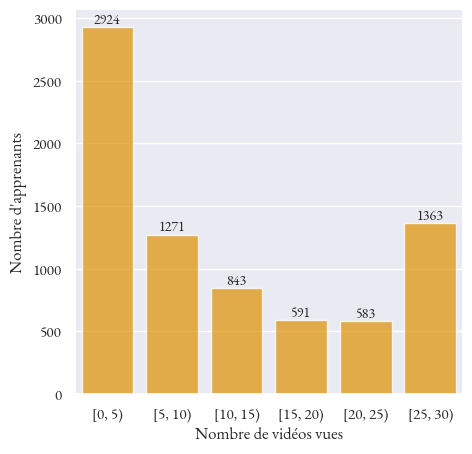

In [273]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création du barplot :
sns.barplot(x = 'Intervalle_Videos', 
            y = 'Nombre_Apprenants', 
            data = distribution_videos_df, 
            color = 'orange', 
            alpha = 0.8)

# Ajout d'un titre au graphique :
titre_figure = "Distribution du nombre de vidéos vues par apprenants"

# Personnalisation des axes :
plt.xlabel('Nombre de vidéos vues')
plt.ylabel("Nombre d'apprenants")

# Rotation des labels des intervalles :
plt.xticks(rotation = 0)

# Ajout des labels au-dessus des barres :
for index, value in enumerate(distribution_videos_df['Nombre_Apprenants']):
    plt.text(index, 
             value + 1, 
             str(value), 
             ha = 'center', 
             va = 'bottom', 
             fontsize = 10)

# Sauvegarde de la figure :
plt.savefig('figure_videos_vues.png')

# Affichage du graphique :
plt.show()

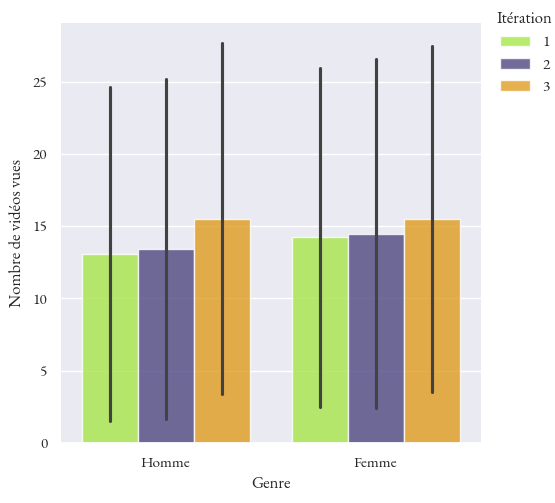

In [274]:
# Création du barplot :
g = sns.catplot(data = resultats_MOOC, 
                kind = "bar",
                x = "Gender", 
                y = "videos_vues", 
                hue = "iteration", 
                errorbar = "sd", 
                palette = ["greenyellow", "darkslateblue", "orange"], 
                alpha = 0.8)

# Personnalisation des bordures :
g.despine(left = True)

# Personnalisation des labels des axes :
g.set_axis_labels("Genre", 
                  "Nombre de vidéos vues")

# Personnalisation de la légende :
g.legend.set_title("Itération")
g.legend.set_bbox_to_anchor((1, 0.9))

# Affichage du graphique :
plt.show()

In [275]:
# Calcul des écarts-types :
ecarts_types = resultats_MOOC.groupby(['Gender', 'iteration'])['videos_vues'].std().reset_index()
ecarts_types.rename(columns = {'videos_vues': 'ecart_type'}, inplace = True)

In [276]:
# Calcul de la moyenne par groupe :
moyennes = resultats_MOOC.groupby(['Gender', 'iteration'])['videos_vues'].mean().reset_index()

In [277]:
# Fusionner les écarts-types et les moyennes
ecarts_moyennes = pd.merge(ecarts_types, moyennes, on = ['Gender', 'iteration'])

In [278]:
# Calcul du coefficient de variation (CV)
ecarts_moyennes['CV'] = (ecarts_moyennes['ecart_type'] / ecarts_moyennes['videos_vues']) * 100

In [279]:
# Arrondir les valeurs de la colonne 'ecart_type' à 1 chiffre après la virgule :
ecarts_moyennes['ecart_type'] = ecarts_moyennes['ecart_type'].round(1)

In [280]:
# Arrondir les valeurs de la colonne 'videos_vues' à 1 chiffre après la virgule :
ecarts_moyennes['videos_vues'] = ecarts_moyennes['videos_vues'].round(1)

In [281]:
# Arrondir les valeurs de la colonne 'CV' à 1 chiffre après la virgule :
ecarts_moyennes['CV'] = ecarts_moyennes['CV'].round(1)

In [282]:
# Changement du nom de la colonne pour la moyenne des vidéos vues :
ecarts_moyennes.rename(columns = {'videos_vues': 'Moyenne des vidéos vues'}, inplace = True)


In [283]:
# Affichage des résultats :
print(ecarts_moyennes[['Gender', 'iteration', 'ecart_type', 'Moyenne des vidéos vues', 'CV']])

  Gender  iteration  ecart_type  Moyenne des vidéos vues    CV
0  Femme          1        11.7                     14.2  82.5
1  Femme          2        12.1                     14.5  83.3
2  Femme          3        12.0                     15.5  77.3
3  Homme          1        11.5                     13.1  88.2
4  Homme          2        11.8                     13.4  87.6
5  Homme          3        12.2                     15.5  78.4


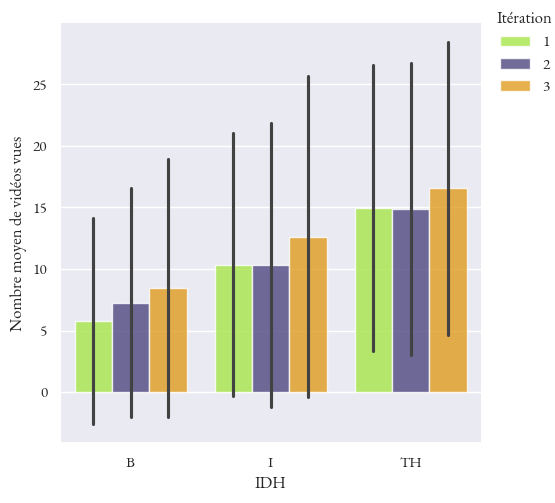

In [284]:
# Création du barplot :
g = sns.catplot(data = resultats_MOOC, 
                kind = "bar",
                x = "HDI_grouped", 
                y = "videos_vues", 
                hue = "iteration", 
                errorbar = "sd", 
                palette = ["greenyellow", "darkslateblue", "orange"], 
                alpha = 0.8)

# Personnalisation des labels des axes :
g.despine(left = True)
g.set_axis_labels("IDH", 
                  "Nombre moyen de vidéos vues")

# Personnalisation de la légende :
g.legend.set_title("Itération")
g.legend.set_bbox_to_anchor((1, 0.9))

# Affichage du graphique :
plt.show()

In [285]:
# Calcul du nombre total de vidéos vues pour chaque groupe (HDI_grouped) en prenant la moyenne :
total_videos_vues = resultats_MOOC.groupby(['HDI_grouped'])['videos_vues'].mean().reset_index()

In [286]:
# Changement du nom de la colonne pour la moyenne des vidéos vues :
total_videos_vues.rename(columns = {'videos_vues': 'Moyenne des vidéos vues'}, inplace = True)

In [287]:
# Arrondi des valeurs à 1 chiffre après la virgule :
total_videos_vues['Moyenne des vidéos vues'] = total_videos_vues['Moyenne des vidéos vues'].round(1)

In [288]:
# Affichage des résultats :
total_videos_vues[['HDI_grouped', 'Moyenne des vidéos vues']]

,HDI_grouped,Moyenne des vidéos vues
0,B,6.5
1,I,10.8
2,TH,15.2


In [289]:
# Calcul des écarts-types de 'videos_vues' groupés par 'HDI_grouped' et 'iteration' :
ecarts_types = resultats_MOOC.groupby(['HDI_grouped', 'iteration'])['videos_vues'].std().reset_index()

In [290]:
# Changement du nom de la colonne 'videos_vues' en 'ecart_type' :
ecarts_types.rename(columns = {'videos_vues': 'ecart_type'}, inplace = True)

In [291]:
# Calcul de la moyenne par groupe :
moyennes = resultats_MOOC.groupby(['HDI_grouped', 'iteration'])['videos_vues'].mean().reset_index()

In [292]:
# Fusion des écarts-types et des moyennes :
ecarts_moyennes = pd.merge(ecarts_types, moyennes, on = ['HDI_grouped', 'iteration'])

In [293]:
# Calcul du coefficient de variation (CV) :
ecarts_moyennes['CV'] = (ecarts_moyennes['ecart_type'] / ecarts_moyennes['videos_vues']) * 100

In [294]:
# Arrondi des valeurs de la colonne 'ecart_type' à 1 chiffre après la virgule :
ecarts_moyennes['ecart_type'] = ecarts_moyennes['ecart_type'].round(1)

In [295]:
# Arrondi des valeurs de la colonne 'videos_vues' à 1 chiffre après la virgule :
ecarts_moyennes['videos_vues'] = ecarts_moyennes['videos_vues'].round(1)

In [296]:
# Arrondi des valeurs de la colonne 'CV' à 1 chiffre après la virgule :
ecarts_moyennes['CV'] = ecarts_moyennes['CV'].round(1)

In [297]:
# Changement du nom de la colonne 'videos-vues' :
ecarts_moyennes.rename(columns = {'videos_vues': 'Moyenne des vidéos vues'}, inplace = True)

In [298]:
# Affichage des résultats :
ecarts_moyennes[['HDI_grouped', 'iteration', 'ecart_type', 'Moyenne des vidéos vues', 'CV']]

,HDI_grouped,iteration,ecart_type,Moyenne des vidéos vues,CV
0,B,1,8.4,5.8,144.6
1,B,2,9.3,7.3,127.8
2,B,3,10.5,8.5,123.3
3,I,1,10.7,10.4,103.2
4,I,2,11.5,10.3,111.5
5,I,3,13.0,12.6,103.1
6,TH,1,11.6,15.0,77.6
7,TH,2,11.9,14.9,79.9
8,TH,3,11.9,16.6,71.7


### 3.3. Un zoom sur les types d’apprenants

In [299]:
# Création du tableau croisé avec les comptages :
pivot_table = pd.crosstab(index = resultats_MOOC['Learner.type'], 
                          columns = resultats_MOOC['iteration'],
                          margins = True,
                          margins_name = 'Total')

In [300]:
# Création d'une colonne 'Taux' :
total_reel = pivot_table['Total'].sum() / 2
pivot_table['Taux'] = pivot_table['Total'] / total_reel * 100

In [301]:
# Arrondi des résultats de la colonne 'Taux' :
pivot_table['Taux'] = pivot_table['Taux'].round(1)
pivot_table

iteration,1,2,3,Total,Taux
Learner.type,,,,,
Auditing,74,45,33,152,1.7
Bystander,936,469,235,1640,18.4
Completer,2378,951,854,4183,46.9
Disengaging,1836,681,432,2949,33.0
Total,5224,2146,1554,8924,100.0


In [302]:
# Définition de la variable pour l'itération souhaitée :
iteration_number = 3

# Création du tableau croisé avec les comptages :
pivot_table = pd.crosstab(index = resultats_MOOC['Learner.type'], 
                          columns = resultats_MOOC['iteration'],
                          margins = True,
                          margins_name = 'Total')

# Sélection de la colonne correspondant à l'itération donnée :
pivot_table = pivot_table[[iteration_number]].rename(columns = {iteration_number: f'Iteration_{iteration_number}'})

# Calcul du total des apprenants pour l'itération :
total_apprenants_iteration = pivot_table[f'Iteration_{iteration_number}'].sum() / 2  

# Calcul du taux en pourcentage pour chaque ligne :
pivot_table['Taux (%)'] = (pivot_table[f'Iteration_{iteration_number}'] / total_apprenants_iteration) * 100

# Arrondi du taux à 1 chiffre :
pivot_table['Taux (%)'] = pivot_table['Taux (%)'].round(1)
pivot_table

iteration,Iteration_3,Taux (%)
Learner.type,,
Auditing,33,2.1
Bystander,235,15.1
Completer,854,55.0
Disengaging,432,27.8
Total,1554,100.0


### 3.4. Chi2 et mosaic plot

In [303]:
# Création d'un dataframe simplifié :
gender_hdi = resultats_MOOC[['Gender', 'HDI_grouped']]

In [304]:
# Création de la table de contingence :
table_initiale = pd.crosstab(gender_hdi['HDI_grouped'], gender_hdi['Gender'])
table_initiale

Gender,Femme,Homme
HDI_grouped,,
B,147,880
I,231,432
TH,2539,4695


In [305]:
# Présentation de la table de contingence avec taux :

# Calcul des pourcentages par rapport aux totaux hommes et femmes :
total_homme = table_initiale['Homme'].sum()
total_femme = table_initiale['Femme'].sum()

# Création d'une copie du DataFrame :
table_formatée = table_initiale[['Homme', 'Femme']].copy()

# Ajout des colonnes pour le format souhaité : Homme (%), Femme (%)
table_formatée['Homme (%)'] = table_formatée['Homme'] / total_homme * 100
table_formatée['Femme (%)'] = table_formatée['Femme'] / total_femme * 100

# Ajout d'une ligne "Total" :
total_lignes = pd.DataFrame({
    'Homme': [total_homme],
    'Homme (%)': [100],
    'Femme': [total_femme],
    'Femme (%)': [100]
}, index=['Total'])

# Concaténation de la ligne de total au DataFrame existant :
table_contingence = pd.concat([table_formatée, total_lignes])

# Arrondi des pourcentages à 1 décimale :
table_contingence = table_contingence.round({'Homme (%)': 1, 'Femme (%)': 1})

# Affichage de la table formatée :
print("\nTable de contingence avec pourcentages et totaux :")
table_contingence


Table de contingence avec pourcentages et totaux :


,Homme,Femme,Homme (%),Femme (%)
B,880,147,14.6,5.0
I,432,231,7.2,7.9
TH,4695,2539,78.2,87.0
Total,6007,2917,100.0,100.0


In [306]:
# Affichage des résultats :
print("Test d'indépendance du chi2 : Genre et Groupe IDH\n")

# Test du chi-2 :
chi2, p_value, dof, expected = chi2_contingency(table_initiale)

# Affichage des résultats du test :
print(f"Chi2 : {chi2:.0f}")
print(f"P-value : {p_value:.4f}")
print(f"Degrés de liberté : {dof}")

# Conversion de la table des valeurs attendues en DataFrame :
table_valeurs_attendues = pd.DataFrame(expected, 
                                       columns = table_initiale.columns, 
                                       index = table_initiale.index)

# Arrondi des valeurs attendues à une décimale :
table_valeurs_attendues = table_valeurs_attendues.round(1)

# Affichage de la table des valeurs attendues :
print("\nTable des valeurs attendues si les variables sont indépendantes :")
table_valeurs_attendues

Test d'indépendance du chi2 : Genre et Groupe IDH

Chi2 : 178
P-value : 0.0000
Degrés de liberté : 2

Table des valeurs attendues si les variables sont indépendantes :


Gender,Femme,Homme
HDI_grouped,,
B,335.7,691.3
I,216.7,446.3
TH,2364.6,4869.4


In [307]:
# Nombre total d'observations :
n = table_initiale.sum().sum()

# Calcul des dimensions de la table  :
r, k = table_initiale.shape

# Calcul du V de Cramér :
min_dim = min(r - 1, k - 1)
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Affichage du V de Cramér :
print(f"V de Cramer : {cramers_v:.2f}")

V de Cramer : 0.14


In [308]:
# Calcul des résidus : 
residus = (table_initiale[['Homme', 'Femme']] - expected) / np.sqrt(expected)

# Arrondi des résidus à 2 décimales :
residus = residus.round(1)

# Affichage des résidus :
print("Résidus du chi2 :")
residus

Résidus du chi2 :


Gender,Homme,Femme
HDI_grouped,,
B,29.7,-20.7
I,14.6,-10.2
TH,47.9,-33.4


In [309]:
# Création du mosaicplot avec la table de contingence :
def props(key):
    x, y = key
    COLORS = {
        'Homme': {
            'B': '#06b6d4',
            'I': '#22d3ee',
            'TH': '#67e8f9',
        },
        'Femme': {
            'B': '#ef4444',
            'I': '#f87171',
            'TH': '#fca5a5',
        }
    }
    print(f'{x = }, {y = }')
    return {'color': COLORS[y][x]}

def labels(key):
    x, y = key
    v = table_initiale[y][x]
    return f'{v}'



x = 'B', y = 'Femme'
x = 'B', y = 'Homme'
x = 'I', y = 'Femme'
x = 'I', y = 'Homme'
x = 'TH', y = 'Femme'
x = 'TH', y = 'Homme'


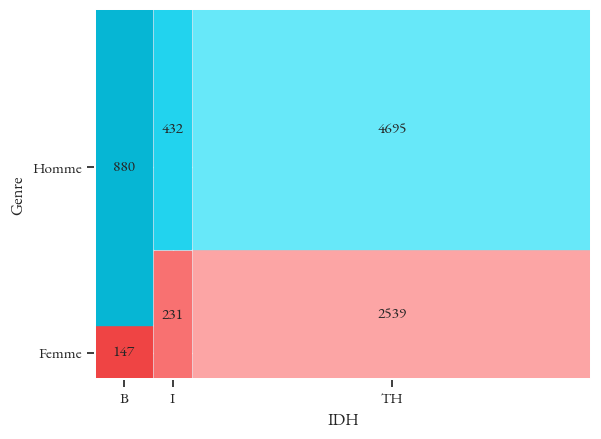

In [310]:
# Création de la figure :
fig, ax = plt.subplots()  

# Génération du mosaic plot :
mosaic(data = table_initiale.stack(),
       axes_label = True,
       properties = props,
       labelizer = labels,
       ax = ax)  

# Personnalisation de la police :
for text in ax.texts:  
    text.set_fontsize(11)

# Ajout des étiquettes des axes :
ax.set_xlabel('IDH')
ax.set_ylabel('Genre')

# Affichage du plot :
plt.show()

x = 'B', y = 'Homme'
x = 'B', y = 'Femme'
x = 'I', y = 'Homme'
x = 'I', y = 'Femme'
x = 'TH', y = 'Homme'
x = 'TH', y = 'Femme'


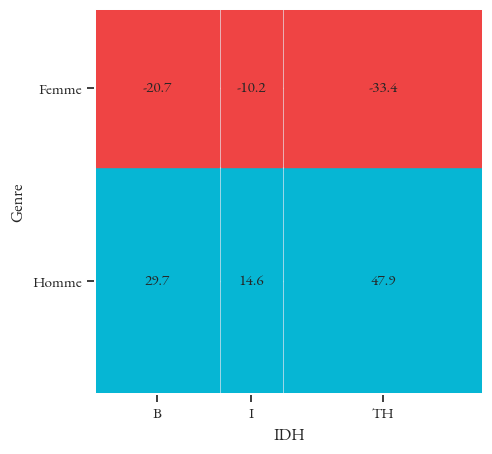

In [311]:
# Appliquer la fonction abs() pour obtenir la valeur absolue des éléments de la table 'résidus' :
residus_abs = np.abs(residus)

# Création du mosaicplot avec la table des résidus :
def props(key):
    x, y = key
    v = residus[y][x]
    COLORS = {
        'Homme': {
            'B': '#06b6d4',
            'I': '#22d3ee',
            'TH': '#67e8f9',
        },
        'Femme': {
            'B': '#ef4444',
            'I': '#f87171',
            'TH': '#fca5a5',
        }
    }
    color = COLORS[y][x]
    color = '#ef4444' if v < 0 else '#06b6d4'
    print(f'{x = }, {y = }')
    return {'color': color}

def labels(key):
    x, y = key
    v = residus[y][x]
    return f'{v}'

# Création du mosaic plot avec personnalisation des couleurs et des labels :
fig, ax = plt.subplots(figsize = (5,5))  

mosaic(data = residus_abs.stack(),
       axes_label = True,
       properties = props,
       labelizer = labels,
       ax = ax)  

# Personnalisation de la police :
for text in ax.texts:
    text.set_fontsize(11)

# Ajout des étiquettes aux axes :
ax.set_xlabel('IDH')  
ax.set_ylabel('Genre')

# Affichage du plot :
plt.show()

> Les couleurs bleues représentent les valeurs de résidus positives et les valeurs rouges représentent les valeurs de résidus négatives.

> Les résidus d'une table de contingence, dans un test du chi², ne peuvent pas être tous négatifs ou positifs car ils mesurent l'écart entre les fréquences observées et attendues. Si tous les résidus étaient du même signe, cela signifierait que les données s'écartent systématiquement dans une seule direction, ce qui ne correspondrait pas à une distribution aléatoire équilibrée. Les résidus doivent donc varier entre positifs et négatifs pour refléter la variabilité naturelle des données.

> Les résultats du test du chi²  (chi²(2, N=10000) = 178, p << 0.001) montrent une statistique chi² de 178 et une p-value << 0.001, bien inférieure au seuil de significativité habituel de 0.05. Cela nous permet de rejeter l'hypothèse nulle selon laquelle les deux variables (genre et IDH) sont indépendantes, ce qui indique qu'il existe une relation statistiquement significative entre le genre et l'IDH.

> Le V de Cramer, calculé à 0.14, suggère une association modérée entre le genre et l'IDH. Cette métrique quantifie l'intensité de la relation : une valeur proche de 0 indique une faible association, tandis qu'une valeur proche de 1 indique une forte association. Un V de Cramer de 0.14 indique donc qu'il existe des différences suffisamment significatives dans la répartition des sexes selon l'IDH.

> Concernant l'interprétation des résidus, ceux-ci montrent que les hommes sont surreprésentés dans les groupes B, I et TH, tandis que les femmes sont sous-représentées par rapport aux valeurs attendues. Les écarts sont particulièrement marqués dans le groupe TH, où les hommes sont surreprésentés avec un excédent de 47.9 individus, tandis que les femmes sont sous-représentées avec un déficit de 33.4 individus. Ces écarts sont systématiques, avec des excédents d'hommes dans chaque groupe et des déficits de femmes, ce qui suggère une dépendance entre le genre et l'IDH. 

> Ces résultats pourraient être le reflet de plusieurs facteurs socio-économiques ou culturels influençant la participation à ce type de MOOC. Par exemple, il est possible que des inégalités de genre existent dans l'accès à la formation, l'intérêt pour ce type de programme, ou la disponibilité des ressources nécessaires pour suivre un MOOC sur l’effectuation. 

> Les hommes pourraient être davantage encouragés ou avoir plus de facilité à s’engager dans ce type de formation, notamment si des stéréotypes de genre influencent leur participation à des programmes axés sur l'entrepreneuriat ou l'innovation. 

> À l'inverse, les femmes pourraient rencontrer des obstacles supplémentaires, comme des responsabilités familiales ou des attentes sociales qui limitent leur disponibilité ou leur accès à ce genre de cursus.

### 3.5. Modèle linéaire, tests non paramétriques

#### 3.5.1. Test non-paramétrique : impact du genre sur le nombre de vidéos vues

In [312]:
# Séparation des données en fonction du genre :
hommes_videos = resultats_MOOC[resultats_MOOC['Gender'] == 'Homme']['videos_vues']
femmes_videos = resultats_MOOC[resultats_MOOC['Gender'] == 'Femme']['videos_vues']

In [313]:
# Test de Student pour comparer les moyennes :
t_stat, p_value = ttest_ind(hommes_videos, femmes_videos)

# Affichage des résultats :
print(f"Statistique t : {t_stat:.2f}")
print(f"P-value : {p_value:.4f}")

Statistique t : -3.64
P-value : 0.0003


In [314]:
# Test de Mann-Whitney U pour comparer les distributions :
u_stat, p_value_mannwhitney = mannwhitneyu(hommes_videos, femmes_videos)

# Affichage des résultats :
print(f"Statistique U : {u_stat:.0f}")
print(f"P-value : {p_value_mannwhitney:.4f}")

Statistique U : 8373795
P-value : 0.0007


> Les résultats du test de Mann-Whitney U montrent une statistique U de 8 373 795 et une p-value << 0.001. 

> La p-value est largement inférieure au seuil de significativité conventionnel de 0.05, ce qui suggère que la différence entre les groupes est statistiquement significative. Le test a été effectué pour comparer le nombre de vidéos vues entre les hommes et les femmes, et ces résultats indiquent que les distributions des deux groupes diffèrent de manière significative.

> La statistique U mesure la différence entre les deux groupes comparés, et une valeur de U élevée comme celle-ci implique qu'il existe une séparation marquée entre les rangs des deux groupes.

> Étant donné que la p-value est inférieure à 0.05, nous rejetons l’hypothèse nulle selon laquelle il n’y aurait pas de différence dans la distribution du nombre de vidéos vues entre les hommes et les femmes. Cela indique qu’il existe une différence significative dans les comportements de consommation de vidéos entre les deux groupes. 

> Toutefois, il est important de noter que ce test non paramétrique ne nous dit pas dans quelle direction se situe cette différence. Pour mieux comprendre cette différence, des analyses supplémentaires, telles que l'examen des médianes ou la taille de l'effet, pourraient être réalisées. 

> Les résultats suggèrent qu'il existe un écart dans la façon dont les hommes et les femmes consomment les vidéos dans ce contexte, ce qui pourrait refléter des comportements différents ou des facteurs externes influençant ces habitudes.

#### 3.5.2. Test non-paramétrique : impact de l'IDH sur le nombre de vidéos vues

In [315]:
# Séparation des groupes en fonction des valeurs d'IDH :
groupes_IDH = [resultats_MOOC[resultats_MOOC['HDI_grouped'] == i]['videos_vues'] for i in resultats_MOOC['HDI_grouped'].unique()]

# Test de Kruskal-Wallis :
stat, p_val = kruskal(*groupes_IDH)

# Affichage des résultats :
print(f"Statistique de Kruskal-Wallis: {stat:.2f}")
print(f"Valeur p: {p_val:.4f}")

Statistique de Kruskal-Wallis: 556.37
Valeur p: 0.0000


#### 3.5.3. Modèle de régression linéaire

In [316]:
# Définition des variables du modèle de régression linéaire :
X = resultats_MOOC['quiz_realises']  # Variable indépendante
y = resultats_MOOC['videos_vues']  # Variable dépendante

# Ajout d'une constante pour l'ordonnée à l'origine :
X_with_const = sm.add_constant(X)

# Création du modèle de régression linéaire :
model = sm.OLS(y, X_with_const)
results = model.fit()

# Résumé du modèle :
print("Résumé du modèle de régression linéaire :")
print(results.summary())

Résumé du modèle de régression linéaire :
                            OLS Regression Results                            
Dep. Variable:            videos_vues   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     9642.
Date:                Sun, 07 Sep 2025   Prob (F-statistic):               0.00
Time:                        16:01:03   Log-Likelihood:                -31404.
No. Observations:                8924   AIC:                         6.281e+04
Df Residuals:                    8922   BIC:                         6.283e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cons

In [317]:
# Test de corrélation de Pearson :
pearson_corr, pearson_p_value = pearsonr(X, y)
print(f"\nCorrélation de Pearson : {pearson_corr:.3f}")
print(f"P-value de Pearson : {pearson_p_value:.4f}")


Corrélation de Pearson : 0.721
P-value de Pearson : 0.0000


In [318]:
# Test de corrélation de Spearman :
spearman_corr, spearman_p_value = spearmanr(X, y)
print(f"\nCorrélation de Spearman : {spearman_corr:.3f}")
print(f"P-value de Spearman : {spearman_p_value:.4f}")


Corrélation de Spearman : 0.711
P-value de Spearman : 0.0000


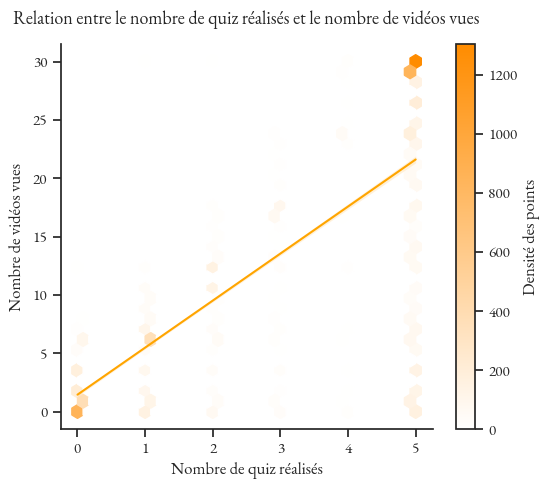

In [319]:
# Définition du style pour le graphique :
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Création d'une palette de couleurs :
cmap = mcolors.LinearSegmentedColormap.from_list("white_to_orange", ["white", "darkorange"])

# Création de la figure :
plt.figure(figsize = (6, 5))

# Utilisation de 'hexbin' :
hb = plt.hexbin(resultats_MOOC['quiz_realises'], 
                resultats_MOOC['videos_vues'], 
                gridsize = 30, 
                cmap = cmap)

# Ajout d'une barre de couleur pour la densité :
plt.colorbar(hb, label = 'Densité des points')

# Ajout d'un titre au graphique :
plt.title('Relation entre le nombre de quiz réalisés et le nombre de vidéos vues', 
          fontsize = 13, 
          pad = 15)

# Ajout du tracé de régression linéaire :
sns.regplot(x = 'quiz_realises', 
            y = 'videos_vues', 
            data = resultats_MOOC, 
            scatter = False,
            line_kws = {'color': 'orange', 
                        'lw': 1.5})

# Ajout d'une étiquette pour l'axe des x :
plt.xlabel('Nombre de quiz réalisés')

# Ajout d'une étiquette pour l'axe des y :
plt.ylabel('Nombre de vidéos vues')

# Affichage du graphique :
plt.show()

> Le scatterplot révèle une forte densité de points autour des coordonnées (0, 0) et (5, 30), ce qui pourrait refléter des comportements spécifiques : d'une part, des apprenants n'ayant pas participé aux quiz ni visionné de vidéos (0, 0), et d'autre part, des apprenants ayant complété tous les quiz et visionné toutes les vidéos (5, 30).

> La concentration des points autour des entiers, due à la nature discrète des variables, peut rendre l'interprétation difficile.

> Pour améliorer la visualisation, il serait utile d'ajuster le format du graphique, par exemple en jouant sur la taille ou la transparence des points.
Une autre option serait d'ajouter un léger "jitter" pour mieux répartir les points (plots en bandes et en essaims), ou encore de mettre en avant la densité des valeurs à l’aide d’intervalles de données, comme dans une matrice des corrélations.

> Étant donné que les tests de corrélation de Pearson et la régression linéaire supposent que les données sont normalement distribuées, il est préférable d'utiliser un test de corrélation non paramétrique, comme le test de Spearman, qui ne repose pas sur l'hypothèse de normalité. La corrélation de Spearman mesure la relation entre les variables, indépendamment de leur distribution.

In [320]:
# Création du modèle de régression linéaire sans interaction :
model = ols('videos_vues ~ C(HDI_grouped) + C(Gender)', data = resultats_MOOC).fit()

# ANOVA de type 2, sans interaction :
anova_table = sm.stats.anova_lm(model, typ = 2)

# Calcul des mean_sq manuellement (sum_sq / df) :
anova_table['mean_sq'] = anova_table['sum_sq'] / anova_table['df']

# Calcul des tailles d'effet (partial eta squared) :
total_sum_sq = anova_table['sum_sq'].sum()
anova_table['eta_squared'] = anova_table['sum_sq'] / total_sum_sq

# Réorganisation des colonnes :
anova_table = anova_table[['df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)', 'eta_squared']]

# Affichage de la table d'ANOVA :
anova_table.round(3)

,df,sum_sq,mean_sq,F,PR(>F),eta_squared
C(HDI_grouped),2.0,74008.054,37004.027,283.876,0.000,0.06
C(Gender),1.0,50.239,50.239,0.385,0.535,0.00
Residual,8920.0,1162744.917,130.353,NaN,NaN,0.94


> Les résultats de l'ANOVA sans interaction montrent que l'effet de l'IDH est significatif (F(2, 8920) = 283.88, p < 0.001), avec un eta carré de 0.06, ce qui indique que l'IDH explique une proportion notable de la variance.

> En revanche, l'effet du genre n'est pas significatif (F(1, 8920) = 0.39, p = 0.54), suggérant qu'il n'y a pas de différence significative entre les sexes.

> Les degrés de liberté (ddl) pour une variable catégorielle sont calculés en fonction du nombre de ses catégories moins 1. 

> Pour la variable Genre, il y a deux catégories possibles : femme et homme. 

> Comme il y a deux modalités, les degrés de liberté sont donc calculés comme 2 - 1, ce qui donne 1 degré de liberté. 

> Pour la variable IDH, il y a trois catégories : B, I et TH. 

> Les degrés de liberté sont donc 3 - 1, ce qui donne 2 degrés de liberté. 

> En résumé, le genre a 1 ddl et l'IDH a 2 ddl, ce qui reflète le nombre de comparaisons indépendantes possibles entre les catégories de chaque variable.

In [321]:
# Vérification des paramètres du modèle :
print(model.params)

Intercept               6.614594
C(HDI_grouped)[T.I]     4.243327
C(HDI_grouped)[T.TH]    8.711312
C(Gender)[T.Homme]     -0.161577
dtype: float64


In [322]:
# Obtention des résultats du modèle :
results = model.summary()

# Extraction des coefficients et statistiques associées :
coefficients = model.params
std_errors = model.bse
t_values = model.tvalues
p_values = model.pvalues

# Création de la table :
table = {'estimate': coefficients[['Intercept', 
                                   'C(HDI_grouped)[T.I]', 
                                   'C(HDI_grouped)[T.TH]', 
                                   'C(Gender)[T.Homme]']],
         'std error': std_errors[['Intercept', 
                                  'C(HDI_grouped)[T.I]', 
                                  'C(HDI_grouped)[T.TH]', 
                                  'C(Gender)[T.Homme]']],
         't value': t_values[['Intercept', 
                              'C(HDI_grouped)[T.I]', 
                              'C(HDI_grouped)[T.TH]', 
                              'C(Gender)[T.Homme]']],
         'PR (> t)': p_values[['Intercept', 
                               'C(HDI_grouped)[T.I]', 
                               'C(HDI_grouped)[T.TH]', 
                               'C(Gender)[T.Homme]']]}

# Conversion en DataFrame :
table_intercept = pd.DataFrame(table)

# Affichage de la table :
table_intercept.round(3)

,estimate,std error,t value,PR (> t)
Intercept,6.615,0.420,15.737,0.000
C(HDI_grouped)[T.I],4.243,0.571,7.427,0.000
C(HDI_grouped)[T.TH],8.711,0.385,22.654,0.000
C(Gender)[T.Homme],-0.162,0.260,-0.621,0.535


> Les résultats montrent que l'IDH a un effet significatif sur la variable dépendante. 

> Comparé au groupe de référence, le groupe I augmente de 4.24 unités (p < 0.001), et le groupe TH de 8.71 unités (p < 0.001). 

> L'intercept est également significatif avec 6.62 (p < 0.001). 

> En revanche, l'effet du genre est non significatif, avec une estimation de -0.16 pour les hommes (p = 0.54), suggérant aucune différence entre les sexes.

> La modalité femme se trouve dans l'intercept. Comparé aux hommes, elles regardent en moyenne 0.16 vidéos en plus.

> Comme la p-value est de 0.535, cela indique que la différence entre les hommes et les femmes dans le nombre de vidéos regardées n'est pas statistiquement significative.

> Autrement dit, cette différence de 0.16 vidéos pourrait très bien être due au hasard.

In [323]:
# Création du modèle de régression linéaire avec interaction, avec les effets principaux de HDI et Gender :
model_interact = ols('videos_vues ~ C(HDI_grouped) * C(Gender)', data = resultats_MOOC).fit()

# ANOVA de type 2 :
anova_table_interact = sm.stats.anova_lm(model_interact, typ = 2)

# Calcul des mean squares :
anova_table_interact['mean_sq'] = anova_table_interact['sum_sq'] / anova_table_interact['df']

# Calcul des tailles d'effet :
total_sum_sq_interact = anova_table_interact['sum_sq'].sum()
anova_table_interact['eta_squared'] = anova_table_interact['sum_sq'] / total_sum_sq_interact

# Réorganisation des colonnes :
anova_table_interact = anova_table_interact[['df', 'sum_sq', 'mean_sq', 'F', 'PR(>F)', 'eta_squared']]

# Affichage de la table d'ANOVA :
anova_table_interact.round(3)

,df,sum_sq,mean_sq,F,PR(>F),eta_squared
C(HDI_grouped),2.0,74008.054,37004.027,283.903,0.000,0.06
C(Gender),1.0,50.239,50.239,0.385,0.535,0.00
C(HDI_grouped):C(Gender),2.0,369.357,184.678,1.417,0.243,0.00
Residual,8918.0,1162375.561,130.340,NaN,NaN,0.94


In [324]:
# TEST DE L'HOMOSCEDASTICITE DES RESIDUS

# Ajustement du style du graphique :
sns.set()
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 10

# Calcul des résidus et des valeurs ajustées :
residuals = model.resid
fitted_values = model.fittedvalues

# Création d'un DataFrame :
df = pd.DataFrame({'residuals': residuals, 'fitted_values': fitted_values})

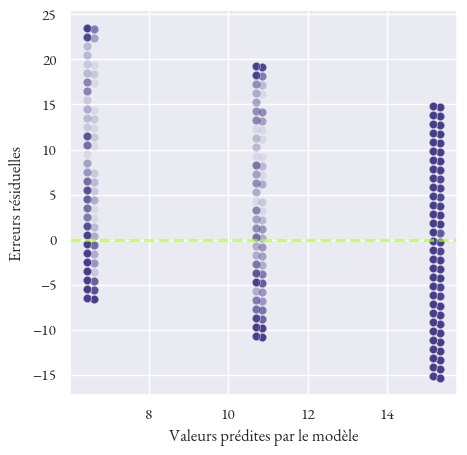

In [325]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Création d'un scatterplot :
sns.scatterplot(x = "fitted_values", 
                y = "residuals",
                data = df, 
                color = 'darkslateblue', 
                alpha = 0.1)

# Ajout d'une ligne horizontale à y = 0 :
plt.axhline(y = 0, 
            color = 'greenyellow', 
            linestyle = '--', 
            linewidth = 2,
            alpha = 0.7)

# Ajout des étiquettes aux axes :
plt.xlabel("Valeurs prédites par le modèle")
plt.ylabel("Erreurs résiduelles")

# Affichage du graphique :
plt.show()

> Le graphique montre un modèle biaisé mais homoscédastique. 

> Les résidus du modèle montrent un biais systématique, avec des erreurs plus élevées à gauche et plus faibles à droite, suggérant une mauvaise spécification du modèle. 

> Cependant, l'écart des résidus reste constant sur l'ensemble du graphique, indiquant une homoscédasticité. Cela signifie que la variance des erreurs est constante, mais le modèle doit être amélioré pour éliminer ce biais, probablement en capturant une relation non linéaire ou en ajustant les variables.

In [326]:
# Récupération des résidus :
residu = model.resid

# Test de Breusch-Pagan pour l'homoscédasticité :
bp_test = het_breuschpagan(residu, model.model.exog)

# Extraction de la statistique et la p-value :
bp_stat, bp_pvalue, _, _ = bp_test

# Affichage des résultats du test :
print(f"Test de Breusch-Pagan : Statistique = {bp_stat:.1f}, p-value = {bp_pvalue:.4f}")

# Interprétation de la p-value :
if bp_pvalue < 0.05:
    print("Les résidus présentent une hétéroscédasticité (variance non constante).")
else:
    print("Les résidus ne présentent pas de problème d'hétéroscédasticité.")

Test de Breusch-Pagan : Statistique = 328.4, p-value = 0.0000
Les résidus présentent une hétéroscédasticité (variance non constante).


> La statistique de test est relativement élevée, ce qui suggère qu'il existe une forte indication d'hétéroscédasticité dans le modèle.

> La p-value est inférieure à 0.05, cela indique que les résidus ne sont pas homoscédastiques (violation de l'homoscédasticité).

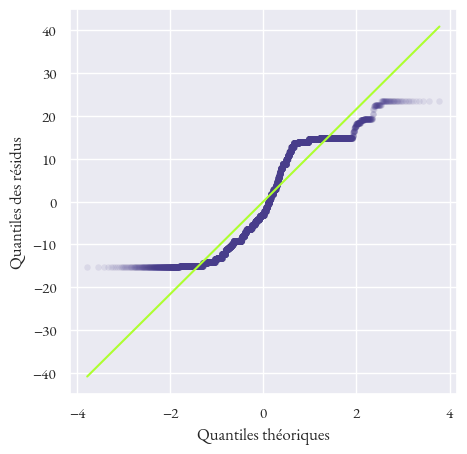

In [327]:
# Création de la figure :
plt.figure(figsize = (5, 5))

# Tracé du QQ plot des résidus :
stats.probplot(residuals, 
               dist = "norm", 
               plot = plt)

# Personnalisation du titre et des axes :
plt.title("")
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles des résidus')

# Modification de la couleur et de la transparence des points :
plt.gca().get_lines()[0].set_markerfacecolor('darkslateblue')
plt.gca().get_lines()[0].set_alpha(0.1)
plt.gca().get_lines()[0].set_markersize(4.5)

# Ajout d'une bordure blanche autour des points :
plt.gca().get_lines()[0].set_markeredgecolor('slateblue')
plt.gca().get_lines()[0].set_markeredgewidth(0.05)

# Modification de la couleur de la ligne de régression :
plt.gca().get_lines()[1].set_color('greenyellow')

# Affichage du graphique :
plt.show()

> Les points ne pas alignés sur la droite verte, cela suggère que les résidus ne suivent pas une distribution normale (courbe en s). 

> Cela indique une violation de l'hypothèse de normalité des erreurs.

In [328]:
# Calcul des VIF :
X = model.model.exog  # Matrice des variables indépendantes

# Création d'un DataFrame vide pour stocker les résultats des VIF :
vif_data = pd.DataFrame()

# Ajout des noms des variables indépendantes dans le DataFrame :
vif_data["variable"] = model.model.exog_names

# Calcul du VIF pour chaque variable indépendante :
vif_data["VIF"] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]

# Affichage des résultats des VIF :
print(vif_data.round(2))

               variable    VIF
0             Intercept  12.09
1   C(HDI_grouped)[T.I]   1.54
2  C(HDI_grouped)[T.TH]   1.55
3    C(Gender)[T.Homme]   1.02


> La vérification des hypothèses du modèle, y compris l'homoscédasticité, la normalité des résidus et la multicolinéarité, a révélé plusieurs problèmes qui remettent en question la validité de l'utilisation de l'ANOVA dans ce contexte.

> L'hétéroscédasticité identifiée par le test de Breusch-Pagan et la déviation des résidus par rapport à la normalité observée dans le QQ plot indiquent que les résidus ne suivent pas une distribution normale et que la variance n'est pas constante. 

> Ces violations des hypothèses de l'ANOVA suggèrent que cette méthode n'était pas appropriée pour analyser l'impact de l'IDH et du genre sur le nombre de vidéos vues. 

> Par conséquent, une approche alternative, comme l'utilisation de modèles non linéaires ou de régressions robustes, serait plus appropriée pour tirer des conclusions fiables.

### 3.6. Régression logistique - binomiale et Poisson

#### 3.6.1. Présenter des odd ratios

In [329]:
# Création d'un nouveau tableau pour exclure les valeurs manquantes de la colonne 'Exam_Certif.bin' :
resultats_MOOC_2 = resultats_MOOC.dropna(subset=['Exam_Certif.bin'])

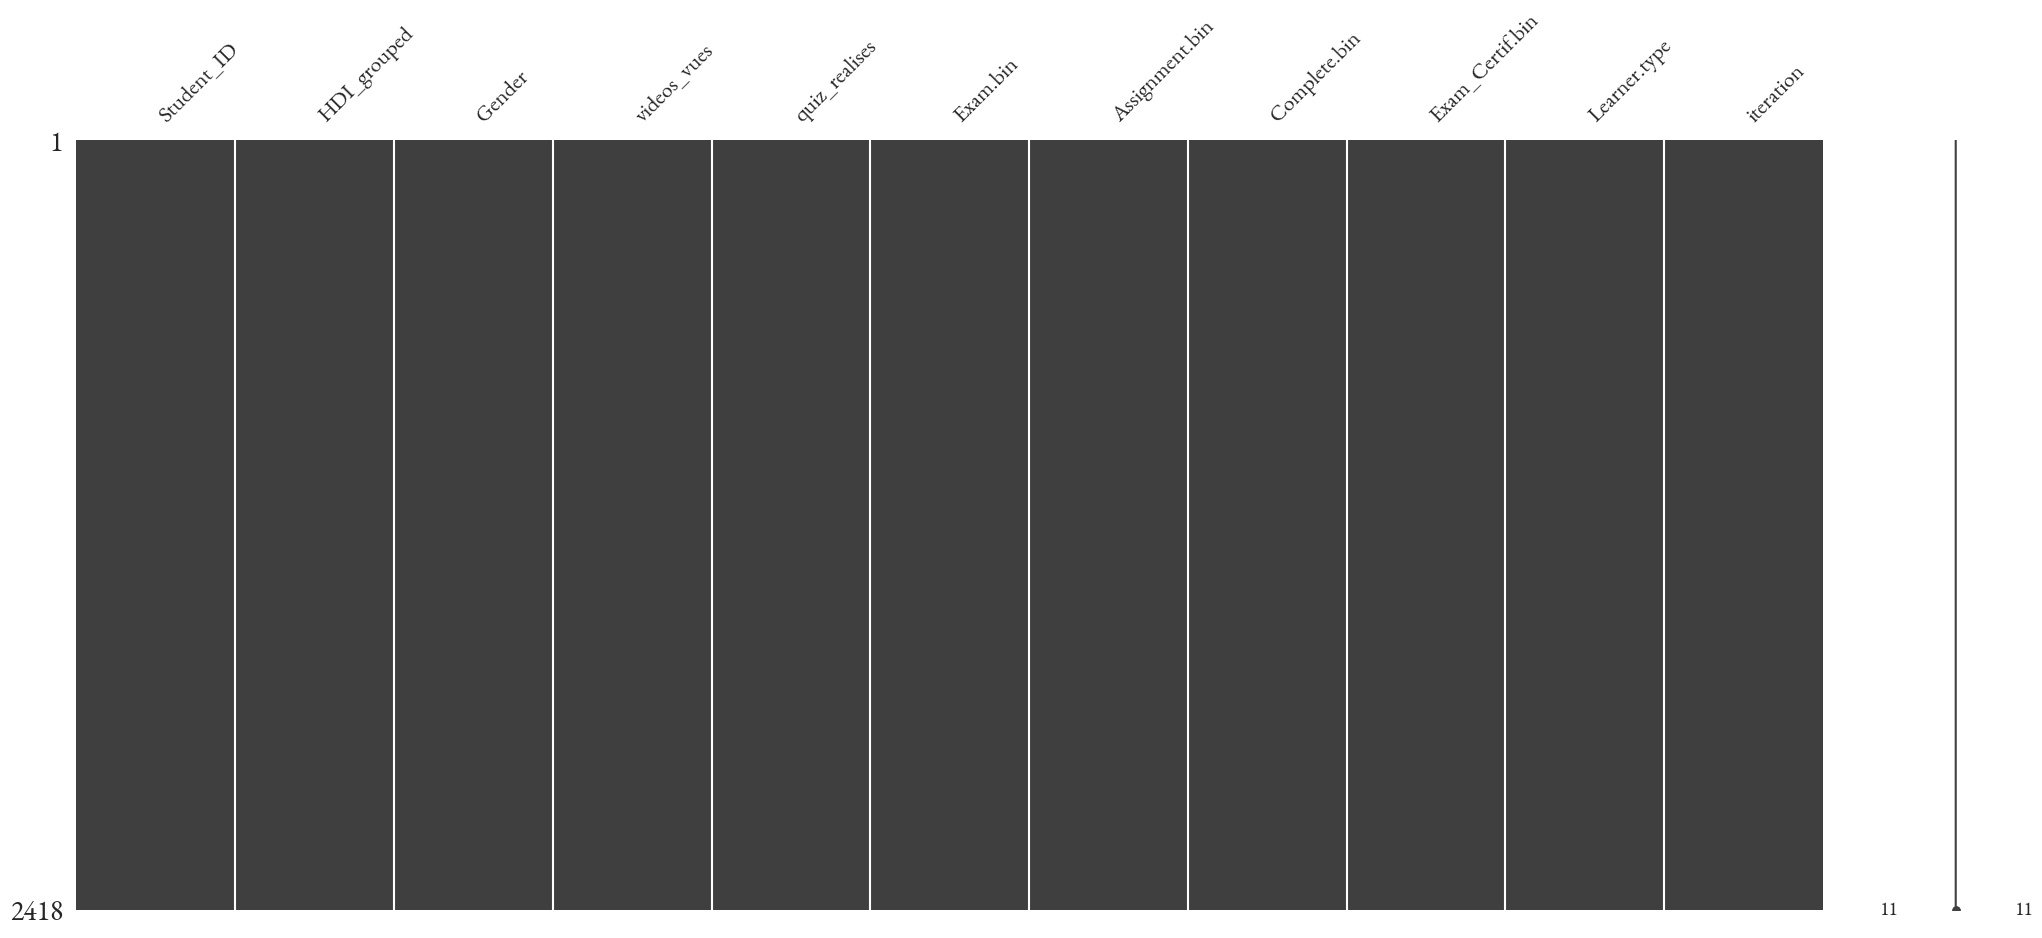

In [330]:
# Affichage d'un graphique des valeurs manquantes :
msno.matrix(resultats_MOOC_2)

# Affichage du plot :
plt.show()

In [331]:
# Conservation des variables d'intérêt :
resultats_MOOC_2 = resultats_MOOC_2[['Gender', 'HDI_grouped', 'Exam_Certif.bin', 'iteration']]
resultats_MOOC_2.head(3)

,Gender,HDI_grouped,Exam_Certif.bin,iteration
13068,Homme,B,1.0,3
13067,Homme,B,1.0,3
13046,Homme,B,1.0,2


In [332]:
# Conversion de 'Gender' en variable binaire :
resultats_MOOC_2.loc[:, 'Gender'] = resultats_MOOC_2['Gender'].map({'Femme': 0, 'Homme': 1})
print(resultats_MOOC_2['Gender'].head(3))

13068    1
13067    1
13046    1
Name: Gender, dtype: object


In [333]:
# Conversion de la colonne 'Gender' en type numérique :
resultats_MOOC_2['Gender'] = pd.to_numeric(resultats_MOOC_2['Gender'], errors='coerce')
print(resultats_MOOC_2.dtypes)

Gender               int64
HDI_grouped         object
Exam_Certif.bin    float64
iteration            int64
dtype: object


In [334]:
# Conversion en type entier tout en gardant les NaN :
resultats_MOOC_2['Exam_Certif.bin'] = resultats_MOOC_2['Exam_Certif.bin'].astype('Int64')

# Vérification du type de la colonne après conversion :
print(resultats_MOOC_2['Exam_Certif.bin'].dtype)

Int64


In [335]:
# Encodage de 'HDI_grouped' en variables indicatrices :
resultats_MOOC_2 = pd.get_dummies(resultats_MOOC_2, 
                                  columns = ['HDI_grouped'], 
                                  drop_first = True)
resultats_MOOC_2.head(3)

,Gender,Exam_Certif.bin,iteration,HDI_grouped_I,HDI_grouped_TH
13068,1,1,3,False,False
13067,1,1,3,False,False
13046,1,1,2,False,False


In [336]:
# Conversion de 'HDI_grouped_TH' en variable numérique (True = 1, False = 0) :
resultats_MOOC_2['HDI_grouped_TH'] = resultats_MOOC_2['HDI_grouped_TH'].astype(int)

In [337]:
# Conversion de 'HDI_grouped_TH' en variable numérique (True=1, False=0) :
resultats_MOOC_2['HDI_grouped_I'] = resultats_MOOC_2['HDI_grouped_I'].astype(int)
resultats_MOOC_2.head(3)

,Gender,Exam_Certif.bin,iteration,HDI_grouped_I,HDI_grouped_TH
13068,1,1,3,0,0
13067,1,1,3,0,0
13046,1,1,2,0,0


In [338]:
# Définition des variables indépendantes (X) et dépendante (y) :
X = resultats_MOOC_2[['Gender', 'HDI_grouped_I', 'HDI_grouped_TH']]
y = resultats_MOOC_2['Exam_Certif.bin']

In [339]:
# Ajout d'une constante (intercept) au modèle :
X = sm.add_constant(X)

In [340]:
# Ajustement du modèle de régression logistique :
model = sm.Logit(y, X)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.624211
         Iterations 5


In [341]:
# Résumé des résultats :
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:        Exam_Certif.bin   No. Observations:                 2418
Model:                          Logit   Df Residuals:                     2414
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:               0.0008539
Time:                        16:01:04   Log-Likelihood:                -1509.3
converged:                       True   LL-Null:                       -1510.6
Covariance Type:            nonrobust   LLR p-value:                    0.4610
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7109      0.167      4.252      0.000       0.383       1.039
Gender             0.1408      0.091      1.545      0.122      -0.038       0.320
HDI_grouped_I     -0.0528      0.227

In [342]:
# Calcul des odds ratios en exponentiant les coefficients :
odds_ratios = np.exp(result.params)
odds_ratios

const             2.035876
Gender            1.151250
HDI_grouped_I     0.948526
HDI_grouped_TH    0.965582
dtype: float64

In [343]:
# Extraction des coefficients et des intervalles de confiance :
coef = result.params
conf = result.conf_int()

# Calcul des odd ratios en exponentiant les coefficients :
odd_ratios = np.exp(coef)

# Calcul des intervalles de confiance pour les odd ratios :
conf_exp = np.exp(conf)

# Construction de la table des odds ratios :
odds_table = pd.DataFrame({
    'Coef': coef,
    'Odds Ratios': odd_ratios,
    'IC 95% (min)': conf_exp[0],  # Intervalle de confiance inférieur
    'IC 95% (max)': conf_exp[1],  # Intervalle de confiance supérieur
    'p-value': result.pvalues
})

# Arrondi des résultats :
odds_table = odds_table.round({'Coef': 2, 
                               'Odds Ratios': 2, 
                               'IC 95% (min)': 2, 
                               'IC 95% (max)': 2, 
                               'p-value': 4})

# Changement des noms des lignes de la table :
odds_table.index = ['Références (Femme & IDH B)', 'Genre = Homme', 'IDH = I', 'IDH = TH']
odds_table

,Coef,Odds Ratios,IC 95% (min),IC 95% (max),p-value
Références (Femme & IDH B),0.71,2.04,1.47,2.83,0.0000
Genre = Homme,0.14,1.15,0.96,1.38,0.1224
IDH = I,-0.05,0.95,0.61,1.48,0.8155
IDH = TH,-0.04,0.97,0.71,1.32,0.8241


> Les résultats de la régression logistique montrent que, par rapport au groupe de référence (femmes avec IDH B), le genre et les différentes catégories d'IDH n'ont pas d'effet significatif sur l'obtention du certificat.

> Pour les hommes, l'odds ratio est de 1,15 (IC 95% : [0,96, 1,38], p = 0,1224), indiquant une légère augmentation des chances d'obtenir le certificat, mais cette différence n'est pas statistiquement significative, car la p-value est supérieure à 0,05. Il n'y a donc pas de preuve suffisante pour conclure à un effet du genre sur l'obtention du certificat.

> Concernant l'IDH, les résultats montrent que l'odds ratio pour IDH I est de 0,95 (IC 95% : [0,61, 1,48], p = 0,8155), ce qui suggère une légère réduction des chances d'obtenir le certificat, mais cette relation n'est pas significative en raison d'une p-value élevée.

> De même, pour IDH TH, l'odds ratio est de 0,97 (IC 95% : [0,71, 1,32], p = 0,8241), indiquant une très faible réduction des chances d'obtenir le certificat, sans effet significatif, puisque la p-value est également supérieure à 0,05.

In [344]:
# Suppression de la première ligne du DataFrame 'odds_table' :
odds_table = odds_table.drop(odds_table.index[0])

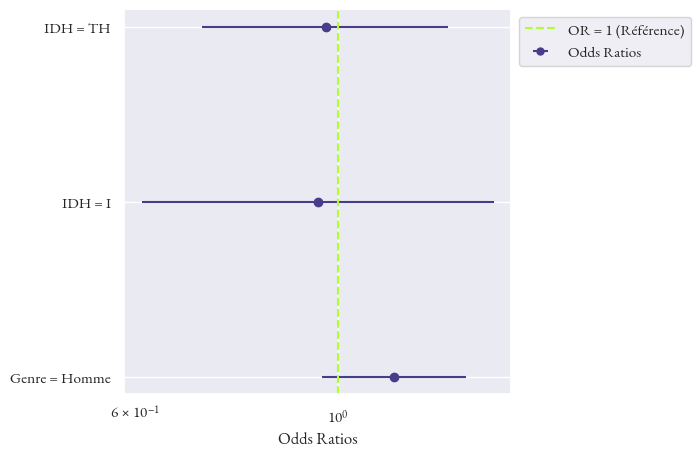

In [345]:
# Ajout d'un style au graphique :
sns.set()

# Changement de la police de caractère :
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 12

# Création du Forest Plot :
plt.figure(figsize=(5, 5))

# Placement des intervalles de confiance :
plt.errorbar(odds_table['Odds Ratios'], 
             range(len(odds_table)),
             xerr = [odds_table['Odds Ratios'] - odds_table['IC 95% (min)'],
                     odds_table['IC 95% (max)'] - odds_table['Odds Ratios']],
             fmt = 'o', 
             color = 'darkslateblue', 
             markersize = 5, 
             label = 'Odds Ratios')

# Ajout des lignes pour les coefficients :
plt.scatter(odds_table['Odds Ratios'],
            range(len(odds_table)),
            color = 'darkslateblue',
            zorder = 5)

# Ajout d'un axe x log-scale :
plt.xscale('log')

# Ajout des étiquettes aux axes :
plt.yticks(range(len(odds_table)), odds_table.index)
plt.xlabel('Odds Ratios')

# Ajout d'une ligne verticale pour l'Odd Ratio = 1 (indicateur d'absence d'effet) :
plt.axvline(x = 1, 
            color = 'greenyellow', 
            linestyle = '--', 
            label = 'OR = 1 (Référence)')

# Légende à l'extérieur en haut à droite :
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))

# Affichage du graphique :
plt.show()

> En conclusion, les résultats de l'ANOVA montrent que l'effet de l'IDH sur le nombre de vidéos vues est significatif (F(2, 89) = 4674, p < 0.001), tandis que l'effet du genre n'est pas significatif (F(1, 89) = 0.41, p = 0.52). 

> L'interaction entre l'IDH et le genre est également non significative (F(2, 89) = 1.42, p = 0.243). 

> En régression logistique, bien que les catégories IDH Intermédiaire (OR = 4.24, p < 0.001) et IDH Très Haut (OR = 8.71, p < 0.001) montrent un effet positif pour l'obtention du certificat ou la réussite de l'examen, cet effet n'est pas statistiquement significatif pour l'IDH dans le modèle (p > 0.05), et le genre n'a pas d'impact significatif sur cette probabilité (OR = 1.15, p = 0.1224).

> L'odds ratio (OR) ne correspond pas stricto sensu au risque relatif (RR) car l'OR compare les cotes (odds) tandis que le RR compare les probabilités (risques) entre deux groupes. 

> Les cotes mesurent le rapport entre la probabilité de l'événement et sa non-survenue, alors que le risque relatif mesure la probabilité d'occurrence de l'événement dans chaque groupe. 

> Les OR et RR convergent uniquement lorsque l'événement est rare, c'est-à-dire lorsque les probabilités sont faibles. 

> Dans ce cas, les cotes se rapprochent des risques, rendant les deux mesures presque équivalentes.

#### 3.6.2. Données de comptage et loi de Poisson

### Figure 1 : Distribution du nombre de vidéos vues par apprenants
![Figure 1 : Distribution du nombre de vidéos Vues par apprenants](figure_videos_vues.png)

> La distribution du nombre de vidéos vues dans un MOOC ne suit pas une loi de Poisson en raison de son asymétrie et des valeurs extrêmes à droite. 

> Beaucoup d'apprenants regardent peu de vidéos, ce qui génère une forte concentration à gauche de l'histogramme. 

> En outre, les comportements des apprenants sont très variés, certains étant plus engagés que d'autres. 

> La loi de Poisson ne convient pas à cette dispersion élevée des données

In [346]:
# Conversion de la variable 'Gender' en type catégoriel :
resultats_MOOC['Gender'] = pd.Categorical(resultats_MOOC['Gender'])

# Création du modèle de régression de Poisson :
poisson_model = smf.poisson('videos_vues ~ HDI_grouped + Gender', data = resultats_MOOC).fit()

# Affichage du résumé des résultats du modèle :
print(poisson_model.summary())

Optimization terminated successfully.
         Current function value: 7.444218
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:            videos_vues   No. Observations:                 8924
Model:                        Poisson   Df Residuals:                     8920
Method:                           MLE   Df Model:                            3
Date:                Sun, 07 Sep 2025   Pseudo R-squ.:                 0.04654
Time:                        16:01:04   Log-Likelihood:                -66432.
converged:                       True   LL-Null:                       -69675.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8778      0.013    141.200      0.000       1.852       1.904
HDI_grou

> Le coefficient pour le genre masculin est de -0.01 (SE = 0.01), avec une z-value de -1.9 et une p-value de 0.06, suggérant un effet marginal, non significatif au niveau de 5 %.

>

#### 3.6.3. Conclure sur une analyse de survie

In [347]:
# Encodage de la variable 'Gender' en numérique :
resultats_MOOC['Gender_encoded'] = resultats_MOOC['Gender'].map({'Femme': 0, 'Homme': 1})

# Création d'une nouvelle colonne 'event' pour définir l'événement (0 = l'apprenant n'a pas vu les vidéos, 1 = l'apprenant a vu au moins une vidéo) :
resultats_MOOC['event'] = (resultats_MOOC['videos_vues'] > 0).astype(int)

# Ajustement d'un modèle de Cox avec 'videos_vues' comme variable de durée et 'Gender_encoded' comme covariable :
cph = CoxPHFitter()

# Ajustement du modèle :
cph.fit(resultats_MOOC[['videos_vues', 'Gender_encoded', 'event']], 
        duration_col = 'videos_vues', 
        event_col = 'event')

<lifelines.CoxPHFitter: fitted with 8924 total observations, 1279 right-censored observations>

<Figure size 1000x600 with 0 Axes>

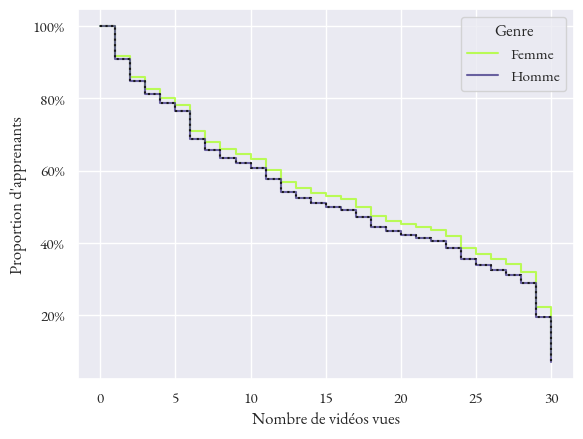

In [348]:
# Création de la figure :
plt.figure(figsize = (10, 6))

# Affichage des courbes de survie par Genre :
cph.plot_covariate_groups('Gender_encoded', 
                          values = [0, 1], 
                          color = ['greenyellow', 'darkslateblue'],
                          alpha = 0.8)

# Modification des labels des x et des y :
plt.xlabel("Nombre de vidéos vues")
plt.ylabel("Proportion d'apprenants")

# Formatage de l'axe des ordonnées en pourcentage :
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax = 1))

# Personnalisation de la légende :
plt.legend(labels = ["Femme", "Homme"], 
           title = "Genre")

# Affichage de la figure :
plt.show()

In [349]:
# Calcul de la moyenne des vidéos vues par genre :
moyenne_videos_par_genre = resultats_MOOC.groupby('Gender', observed = True)['videos_vues'].mean().reset_index()
moyenne_videos_par_genre.round(1)

,Gender,videos_vues
0,Femme,14.5
1,Homme,13.6


In [350]:
# Calcul de la moyenne des vidéos vues par genre :
moyenne_videos_par_genre = resultats_MOOC.groupby('Gender', observed = True)['videos_vues'].mean().reset_index()
moyenne_videos_par_genre.round(1)

,Gender,videos_vues
0,Femme,14.5
1,Homme,13.6


In [351]:
# Encodage de la variable 'HDI_grouped' en numérique :
resultats_MOOC['HDI_encoded'] = resultats_MOOC['HDI_grouped'].map({'B': 0, 'I': 1, 'TH' : 2})

# Création d'une nouvelle colonne 'event' pour définir l'événement (0 = l'apprenant n'a pas vu les vidéos, 1 = l'apprenant a vu au moins une vidéo) :
resultats_MOOC['event'] = (resultats_MOOC['videos_vues'] > 0).astype(int)

# Ajustement d'un modèle de Cox avec 'videos_vues' comme variable de durée et 'Gender_encoded' comme covariable :
cph = CoxPHFitter()

# Ajustement du modèle :
cph.fit(resultats_MOOC[['videos_vues', 'HDI_encoded', 'event']], duration_col='videos_vues', event_col='event')

<lifelines.CoxPHFitter: fitted with 8924 total observations, 1279 right-censored observations>

In [352]:
# Calcul de la moyenne des vidéos vues par IDH :
moyenne_videos_par_idh = resultats_MOOC.groupby('HDI_grouped', observed = True)['videos_vues'].mean().reset_index()

# Arrondi des moyennes à 1 chiffre après la virgule :
moyenne_videos_par_idh['videos_vues'] = moyenne_videos_par_idh['videos_vues'].round(1)
moyenne_videos_par_idh

,HDI_grouped,videos_vues
0,B,6.5
1,I,10.8
2,TH,15.2


<Figure size 600x600 with 0 Axes>

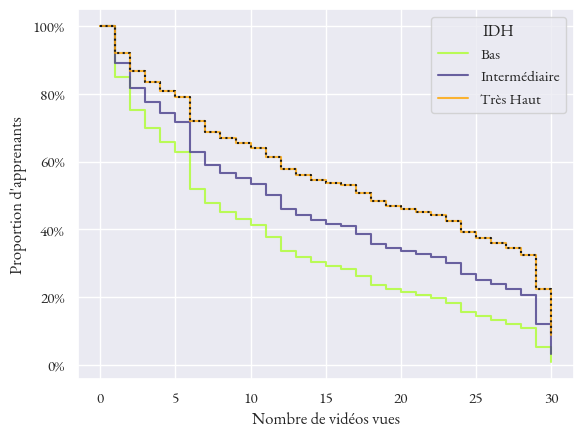

In [353]:
# Création de la figure :
plt.figure(figsize = (6, 6))

# Affichage des courbes de survie par HDI :
cph.plot_covariate_groups('HDI_encoded', 
                          values = [0, 1, 2], 
                          color = ['greenyellow', 'darkslateblue', 'orange'],
                          alpha = 0.8)

# Ajout des étiquettes aux axes :
plt.xlabel("Nombre de vidéos vues")
plt.ylabel("Proportion d'apprenants")

# Formatage de l'axe des ordonnées en pourcentage :
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))

# Personnalisation de la légende :
plt.legend(labels = ["Bas", "Intermédiaire", "Très Haut"], 
           title = "IDH")

# Affichage de la figure :
plt.show()

> Les analyses ont révélé des différences significatives dans la consommation de vidéos entre les auditeurs et les apprenants désengagés, mesurées par les Hazard Ratios (HR). 

> Pour les auditeurs, le HR était de 1,78, indiquant qu'ils consommaient plus de vidéos que les apprenants désengagés (HR = 1,66 pour les apprenants désengagés). 

> En revanche, les apprenants désengagés avaient un HR de 2,33, suggérant une consommation plus faible de vidéos par rapport aux auditeurs. 

> Les résultats ont montré une différence statistiquement significative, avec une p-value < 0,001, ce qui indique que ces différences de consommation sont significatives sur le plan statistique.